In [1]:
"""Preprocess text extracted from scholarly articles into keyphrase candidates.       

The expected input is a list of text extracted from scholarly papers published in Russian from
the dialog conference. The first step is to remove the reference section and any unusually short
paragraphs. Then, parenthesized and bracketed text are removed, as well as any words that happen
to be cut off at a new page boundary.

The text is then tokenized using the preprocessing and tokenization technique developed by 
WebVectores [Kutuzov 2017]. At this point, documents in the corpus are transformed into
lists of tokens corresponding to the paragraphs in the document. Tokens are unigrams of lowercased
lemmas or punctuation marks.

Each document is then broken into sentences, and n-grams are added. This results in each document
being transformed into a list of sentence tokens, which may be unigrams, bigrams, or trigrams.
Finally, the sentence tokens are filtered to remove any unusually short or long tokens and stop
words. The document is flattened, resulting in it being transformed into a list of keyphrase 
candidate tokens.

Typical usage example:

    file_names = get_file_names("../data/raw_txt/2010/ru", ".txt")
    corpus = [get_text(name) for name in file_names]
    corpus = ScholarlyPreprocessor.preprocess(corpus, file_names)
"""

# Reset the kernel (ipython magic command)
%reset -f

<Figure size 432x288 with 0 Axes>

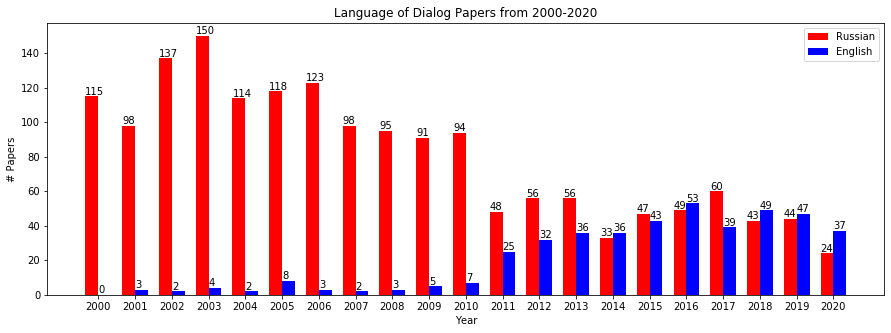

In [7]:
from helpers import get_file_names
from pathlib import Path

import matplotlib.pyplot as plt


# Extract all articles from 2010-2020
year_range = range(2000, 2021)
en_docs = []
ru_docs = []

for year in year_range:
    en_docs.append(len(get_file_names("../data/raw_txt/" +
                                      str(year) + "/en", ".txt")))
    ru_docs.append(len(get_file_names("../data/raw_txt/" +
                                      str(year) + "/ru", ".txt")))

plt.clf()
plt.figure(figsize=(15,5))
plt.title("Language of Dialog Papers from 2000-2020")
plt.xlabel("Year") 
plt.ylabel("# Papers")

width = 0.35
xlocs = [i for i in year_range]
plt.bar(year_range, ru_docs, width, label="Russian", color='red')
for x, y in enumerate(ru_docs):
    plt.text(xlocs[x] - width/2, y + 1, str(y))

plt.bar([year + width for year in year_range], en_docs, width, label="English",
       color='blue')
for x, y in enumerate(en_docs):
    plt.text(xlocs[x] + width/2, y + 1, str(y))

plt.xticks([year + width/2 for year in year_range], year_range)
plt.legend(loc="best")
plt.savefig('../data/LDA/language_distribution.png')
plt.show()

In [3]:
from helpers import get_file_names, get_text
from pathlib import Path
from preprocessing import ScholarlyPreprocessor

import os
import pickle


# Preprocess the entire corpus
year_range = range(2000, 2021)
target = str(Path("../data/preprocessed").resolve())
if not os.path.exists(target):
    os.makedirs(target)

for year in year_range:
    output_file = Path(target, str(year) + ".pickle")
    if not os.path.isfile(output_file):
        print("Preprocessing text from", year, "to", output_file)

        file_names = get_file_names("../data/raw_txt/" + str(year)
                                    + "/ru", ".txt")
        corpus = [get_text(name) for name in file_names]
        corpus = ScholarlyPreprocessor.preprocess(corpus, file_names)

        with open(output_file, "wb") as file:
            pickle.dump(corpus, file, pickle.HIGHEST_PROTOCOL)
        print("Finished preprocessing text from", year, 
              "to", output_file)
    else:
        print(output_file, "already preprocessed")

2020-07-28 09:12:43,751 : INFO : Could not find references section for file: ..\data\raw_txt\2000\ru\abbyy-retrieval-morphology-engine.txt


Preprocessing text from 2000 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2000.pickle


2020-07-28 09:12:44,436 : INFO : collecting all words and their counts
2020-07-28 09:12:44,437 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:12:44,439 : INFO : collected 500 word types from a corpus of 565 words (unigram + bigrams) and 41 sentences
2020-07-28 09:12:44,440 : INFO : using 500 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:12:44,443 : INFO : collecting all words and their counts
2020-07-28 09:12:44,444 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:12:44,450 : INFO : collected 500 word types from a corpus of 555 words (unigram + bigrams) and 41 sentences
2020-07-28 09:12:44,451 : INFO : using 500 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:12:46,072 : INFO : collecting all words and their counts
2020-07-28 09:12:46,073 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word t

2020-07-28 09:12:55,341 : INFO : Could not find references section for file: ..\data\raw_txt\2000\ru\вариант-системы-распознавания-речи.txt
2020-07-28 09:12:57,437 : INFO : collecting all words and their counts
2020-07-28 09:12:57,438 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:12:57,443 : INFO : collected 1423 word types from a corpus of 2092 words (unigram + bigrams) and 127 sentences
2020-07-28 09:12:57,443 : INFO : using 1423 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:12:57,445 : INFO : collecting all words and their counts
2020-07-28 09:12:57,445 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:12:57,457 : INFO : collected 1419 word types from a corpus of 2060 words (unigram + bigrams) and 127 sentences
2020-07-28 09:12:57,458 : INFO : using 1419 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 0

2020-07-28 09:13:14,648 : INFO : using 1748 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:13:14,650 : INFO : collecting all words and their counts
2020-07-28 09:13:14,650 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:13:14,672 : INFO : collected 1748 word types from a corpus of 2295 words (unigram + bigrams) and 146 sentences
2020-07-28 09:13:14,673 : INFO : using 1748 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:13:17,618 : INFO : collecting all words and their counts
2020-07-28 09:13:17,619 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:13:17,625 : INFO : collected 2044 word types from a corpus of 2964 words (unigram + bigrams) and 229 sentences
2020-07-28 09:13:17,627 : INFO : using 2044 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:13:1

2020-07-28 09:13:30,952 : INFO : using 1263 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:13:36,420 : INFO : collecting all words and their counts
2020-07-28 09:13:36,423 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:13:36,436 : INFO : collected 1401 word types from a corpus of 1993 words (unigram + bigrams) and 138 sentences
2020-07-28 09:13:36,438 : INFO : using 1401 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:13:36,441 : INFO : collecting all words and their counts
2020-07-28 09:13:36,443 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:13:36,479 : INFO : collected 1396 word types from a corpus of 1892 words (unigram + bigrams) and 138 sentences
2020-07-28 09:13:36,480 : INFO : using 1396 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:13:4

2020-07-28 09:13:58,286 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:13:58,302 : INFO : collected 1492 word types from a corpus of 1872 words (unigram + bigrams) and 103 sentences
2020-07-28 09:13:58,303 : INFO : using 1492 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:13:59,106 : INFO : collecting all words and their counts
2020-07-28 09:13:59,107 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:13:59,109 : INFO : collected 532 word types from a corpus of 731 words (unigram + bigrams) and 37 sentences
2020-07-28 09:13:59,110 : INFO : using 532 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:13:59,112 : INFO : collecting all words and their counts
2020-07-28 09:13:59,113 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:13:59,118 : INFO : collected 534 word types from

2020-07-28 09:14:20,222 : INFO : using 1787 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:14:20,224 : INFO : collecting all words and their counts
2020-07-28 09:14:20,224 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:14:20,240 : INFO : collected 1785 word types from a corpus of 2703 words (unigram + bigrams) and 135 sentences
2020-07-28 09:14:20,241 : INFO : using 1785 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:14:23,597 : INFO : collecting all words and their counts
2020-07-28 09:14:23,598 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:14:23,602 : INFO : collected 2104 word types from a corpus of 3069 words (unigram + bigrams) and 167 sentences
2020-07-28 09:14:23,603 : INFO : using 2104 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:14:2

2020-07-28 09:14:37,961 : INFO : collected 1690 word types from a corpus of 2548 words (unigram + bigrams) and 160 sentences
2020-07-28 09:14:37,962 : INFO : using 1690 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:14:40,133 : INFO : collecting all words and their counts
2020-07-28 09:14:40,134 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:14:40,138 : INFO : collected 1373 word types from a corpus of 2177 words (unigram + bigrams) and 140 sentences
2020-07-28 09:14:40,138 : INFO : using 1373 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:14:40,140 : INFO : collecting all words and their counts
2020-07-28 09:14:40,140 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:14:40,157 : INFO : collected 1374 word types from a corpus of 2157 words (unigram + bigrams) and 140 sentences
2020-07-28 09:14:40,157 : I

2020-07-28 09:14:55,609 : INFO : collecting all words and their counts
2020-07-28 09:14:55,610 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:14:55,615 : INFO : collected 1376 word types from a corpus of 2293 words (unigram + bigrams) and 117 sentences
2020-07-28 09:14:55,616 : INFO : using 1376 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:14:55,617 : INFO : collecting all words and their counts
2020-07-28 09:14:55,618 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:14:55,629 : INFO : collected 1379 word types from a corpus of 2257 words (unigram + bigrams) and 117 sentences
2020-07-28 09:14:55,630 : INFO : using 1379 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:14:57,873 : INFO : collecting all words and their counts
2020-07-28 09:14:57,874 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-28 09:15:06,806 : INFO : using 635 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:15:06,808 : INFO : collecting all words and their counts
2020-07-28 09:15:06,809 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:15:06,817 : INFO : collected 634 word types from a corpus of 863 words (unigram + bigrams) and 39 sentences
2020-07-28 09:15:06,818 : INFO : using 634 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:15:07,629 : INFO : collecting all words and their counts
2020-07-28 09:15:07,630 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:15:07,631 : INFO : collected 562 word types from a corpus of 777 words (unigram + bigrams) and 34 sentences
2020-07-28 09:15:07,632 : INFO : using 562 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:15:07,634 : I

2020-07-28 09:15:22,012 : INFO : using 2049 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:15:22,811 : INFO : collecting all words and their counts
2020-07-28 09:15:22,812 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:15:22,813 : INFO : collected 512 word types from a corpus of 794 words (unigram + bigrams) and 42 sentences
2020-07-28 09:15:22,814 : INFO : using 512 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:15:22,815 : INFO : collecting all words and their counts
2020-07-28 09:15:22,817 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:15:22,822 : INFO : collected 511 word types from a corpus of 783 words (unigram + bigrams) and 42 sentences
2020-07-28 09:15:22,822 : INFO : using 511 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:15:24,184 : 

2020-07-28 09:15:49,719 : INFO : collected 929 word types from a corpus of 1005 words (unigram + bigrams) and 40 sentences
2020-07-28 09:15:49,720 : INFO : using 929 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:15:49,721 : INFO : collecting all words and their counts
2020-07-28 09:15:49,722 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:15:49,729 : INFO : collected 929 word types from a corpus of 1005 words (unigram + bigrams) and 40 sentences
2020-07-28 09:15:49,729 : INFO : using 929 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:15:49,750 : INFO : Could not find references section for file: ..\data\raw_txt\2000\ru\семантико-синтаксический-анализатор-предложений-татарского-языка.txt
2020-07-28 09:15:49,752 : INFO : collecting all words and their counts
2020-07-28 09:15:49,752 : INFO : collected 0 word types from a corpus of 0 words (

2020-07-28 09:16:04,354 : INFO : collecting all words and their counts
2020-07-28 09:16:04,355 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:16:04,357 : INFO : collected 442 word types from a corpus of 653 words (unigram + bigrams) and 37 sentences
2020-07-28 09:16:04,358 : INFO : using 442 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:16:04,359 : INFO : collecting all words and their counts
2020-07-28 09:16:04,360 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:16:04,367 : INFO : collected 443 word types from a corpus of 644 words (unigram + bigrams) and 37 sentences
2020-07-28 09:16:04,368 : INFO : using 443 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:16:08,050 : INFO : collecting all words and their counts
2020-07-28 09:16:08,051 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word t

2020-07-28 09:16:23,053 : INFO : collected 770 word types from a corpus of 898 words (unigram + bigrams) and 53 sentences
2020-07-28 09:16:23,054 : INFO : using 770 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:16:23,071 : INFO : Could not find references section for file: ..\data\raw_txt\2000\ru\эксперименты-по-синтаксическому-анализу-методом-сравнения-с-архивом-примеров.txt
2020-07-28 09:16:23,156 : INFO : collecting all words and their counts
2020-07-28 09:16:23,156 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:16:23,157 : INFO : collected 106 word types from a corpus of 89 words (unigram + bigrams) and 7 sentences
2020-07-28 09:16:23,157 : INFO : using 106 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:16:23,159 : INFO : collecting all words and their counts
2020-07-28 09:16:23,160 : INFO : PROGRESS: at sentence #0, processed 0 wor

Finished preprocessing text from 2000 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2000.pickle
Preprocessing text from 2001 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2001.pickle


2020-07-28 09:16:24,054 : INFO : Could not find references section for file: ..\data\raw_txt\2001\ru\cтепень-и-количество-русские-наречия-очень-весьма-сильно-полностью-целиком.txt
2020-07-28 09:16:26,189 : INFO : collecting all words and their counts
2020-07-28 09:16:26,190 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:16:26,194 : INFO : collected 1551 word types from a corpus of 2213 words (unigram + bigrams) and 145 sentences
2020-07-28 09:16:26,195 : INFO : using 1551 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:16:26,196 : INFO : collecting all words and their counts
2020-07-28 09:16:26,197 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:16:26,210 : INFO : collected 1554 word types from a corpus of 2198 words (unigram + bigrams) and 145 sentences
2020-07-28 09:16:26,210 : INFO : using 1554 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.

2020-07-28 09:16:44,278 : INFO : using 1085 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:16:44,279 : INFO : collecting all words and their counts
2020-07-28 09:16:44,280 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:16:44,290 : INFO : collected 1087 word types from a corpus of 1381 words (unigram + bigrams) and 95 sentences
2020-07-28 09:16:44,290 : INFO : using 1087 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:16:45,233 : INFO : collecting all words and their counts
2020-07-28 09:16:45,234 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:16:45,236 : INFO : collected 697 word types from a corpus of 963 words (unigram + bigrams) and 47 sentences
2020-07-28 09:16:45,237 : INFO : using 697 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:16:45,239

2020-07-28 09:17:04,095 : INFO : collecting all words and their counts
2020-07-28 09:17:04,097 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:17:04,100 : INFO : collected 855 word types from a corpus of 1164 words (unigram + bigrams) and 60 sentences
2020-07-28 09:17:04,102 : INFO : using 855 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:17:04,104 : INFO : collecting all words and their counts
2020-07-28 09:17:04,105 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:17:04,113 : INFO : collected 855 word types from a corpus of 1154 words (unigram + bigrams) and 60 sentences
2020-07-28 09:17:04,114 : INFO : using 855 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:17:04,589 : INFO : collecting all words and their counts
2020-07-28 09:17:04,590 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word

2020-07-28 09:17:17,339 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:17:17,346 : INFO : collected 664 word types from a corpus of 748 words (unigram + bigrams) and 37 sentences
2020-07-28 09:17:17,347 : INFO : using 664 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:17:17,374 : INFO : Could not find references section for file: ..\data\raw_txt\2001\ru\компьютерная-семантика-русского-языка.txt
2020-07-28 09:17:19,689 : INFO : collecting all words and their counts
2020-07-28 09:17:19,689 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:17:19,692 : INFO : collected 1024 word types from a corpus of 1689 words (unigram + bigrams) and 142 sentences
2020-07-28 09:17:19,693 : INFO : using 1024 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:17:19,695 : INFO : collecting all words and their counts
2020-07-28 09

2020-07-28 09:17:54,931 : INFO : collecting all words and their counts
2020-07-28 09:17:54,932 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:17:54,939 : INFO : collected 1531 word types from a corpus of 1936 words (unigram + bigrams) and 109 sentences
2020-07-28 09:17:54,940 : INFO : using 1531 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:17:54,941 : INFO : collecting all words and their counts
2020-07-28 09:17:54,942 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:17:54,956 : INFO : collected 1530 word types from a corpus of 1920 words (unigram + bigrams) and 109 sentences
2020-07-28 09:17:54,957 : INFO : using 1530 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:17:55,001 : INFO : Could not find references section for file: ..\data\raw_txt\2001\ru\методы-поиска-документов-подобных-документу-образцу

2020-07-28 09:18:16,752 : INFO : collected 1424 word types from a corpus of 1793 words (unigram + bigrams) and 87 sentences
2020-07-28 09:18:16,752 : INFO : using 1424 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:18:16,755 : INFO : collecting all words and their counts
2020-07-28 09:18:16,756 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:18:16,776 : INFO : collected 1424 word types from a corpus of 1793 words (unigram + bigrams) and 87 sentences
2020-07-28 09:18:16,778 : INFO : using 1424 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:18:18,639 : INFO : collecting all words and their counts
2020-07-28 09:18:18,640 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:18:18,643 : INFO : collected 975 word types from a corpus of 1467 words (unigram + bigrams) and 94 sentences
2020-07-28 09:18:18,644 : INFO 

2020-07-28 09:18:36,096 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:18:36,120 : INFO : collected 2564 word types from a corpus of 3912 words (unigram + bigrams) and 314 sentences
2020-07-28 09:18:36,120 : INFO : using 2564 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:18:37,360 : INFO : collecting all words and their counts
2020-07-28 09:18:37,361 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:18:37,362 : INFO : collected 502 word types from a corpus of 635 words (unigram + bigrams) and 31 sentences
2020-07-28 09:18:37,363 : INFO : using 502 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:18:37,365 : INFO : collecting all words and their counts
2020-07-28 09:18:37,366 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:18:37,371 : INFO : collected 502 word types from

2020-07-28 09:18:50,776 : INFO : collected 573 word types from a corpus of 688 words (unigram + bigrams) and 37 sentences
2020-07-28 09:18:50,777 : INFO : using 573 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:18:52,963 : INFO : collecting all words and their counts
2020-07-28 09:18:52,963 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:18:52,967 : INFO : collected 1362 word types from a corpus of 2195 words (unigram + bigrams) and 116 sentences
2020-07-28 09:18:52,968 : INFO : using 1362 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:18:52,969 : INFO : collecting all words and their counts
2020-07-28 09:18:52,971 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:18:52,987 : INFO : collected 1365 word types from a corpus of 2174 words (unigram + bigrams) and 116 sentences
2020-07-28 09:18:52,987 : INFO 

2020-07-28 09:19:07,928 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:19:07,934 : INFO : collected 912 word types from a corpus of 1554 words (unigram + bigrams) and 104 sentences
2020-07-28 09:19:07,935 : INFO : using 912 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:19:07,938 : INFO : collecting all words and their counts
2020-07-28 09:19:07,939 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:19:07,951 : INFO : collected 914 word types from a corpus of 1544 words (unigram + bigrams) and 104 sentences
2020-07-28 09:19:07,952 : INFO : using 914 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:19:11,105 : INFO : collecting all words and their counts
2020-07-28 09:19:11,106 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:19:11,111 : INFO : collected 1647 word types fro

2020-07-28 09:19:25,322 : INFO : using 1312 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:19:28,908 : INFO : collecting all words and their counts
2020-07-28 09:19:28,909 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:19:28,916 : INFO : collected 2149 word types from a corpus of 3373 words (unigram + bigrams) and 166 sentences
2020-07-28 09:19:28,917 : INFO : using 2149 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:19:28,918 : INFO : collecting all words and their counts
2020-07-28 09:19:28,919 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:19:28,945 : INFO : collected 2149 word types from a corpus of 3358 words (unigram + bigrams) and 166 sentences
2020-07-28 09:19:28,945 : INFO : using 2149 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:19:3

2020-07-28 09:19:56,249 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:19:56,253 : INFO : collected 1220 word types from a corpus of 1870 words (unigram + bigrams) and 92 sentences
2020-07-28 09:19:56,253 : INFO : using 1220 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:19:56,256 : INFO : collecting all words and their counts
2020-07-28 09:19:56,257 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:19:56,270 : INFO : collected 1219 word types from a corpus of 1809 words (unigram + bigrams) and 92 sentences
2020-07-28 09:19:56,271 : INFO : using 1219 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:19:58,860 : INFO : collecting all words and their counts
2020-07-28 09:19:58,860 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:19:58,864 : INFO : collected 1554 word types f

Finished preprocessing text from 2001 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2001.pickle
Preprocessing text from 2002 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2002.pickle


2020-07-28 09:20:02,905 : INFO : Could not find references section for file: ..\data\raw_txt\2002\ru\lingua-an-architecture-for-robust-text-processing-in-bulgarian.txt
2020-07-28 09:20:02,952 : INFO : collecting all words and their counts
2020-07-28 09:20:02,953 : INFO : collected 0 word types from a corpus of 0 words (unigram + bigrams) and 0 sentences
2020-07-28 09:20:02,953 : INFO : using 0 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:20:02,955 : INFO : collecting all words and their counts
2020-07-28 09:20:02,956 : INFO : collected 0 word types from a corpus of 0 words (unigram + bigrams) and 0 sentences
2020-07-28 09:20:02,956 : INFO : using 0 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:20:03,625 : INFO : collecting all words and their counts
2020-07-28 09:20:03,626 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:20:03,627 : INF

2020-07-28 09:20:17,668 : INFO : collecting all words and their counts
2020-07-28 09:20:17,669 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:20:17,679 : INFO : collected 1223 word types from a corpus of 2169 words (unigram + bigrams) and 180 sentences
2020-07-28 09:20:17,679 : INFO : using 1223 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:20:18,972 : INFO : collecting all words and their counts
2020-07-28 09:20:18,972 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:20:18,974 : INFO : collected 982 word types from a corpus of 1453 words (unigram + bigrams) and 86 sentences
2020-07-28 09:20:18,976 : INFO : using 982 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:20:18,977 : INFO : collecting all words and their counts
2020-07-28 09:20:18,978 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 w

2020-07-28 09:20:35,349 : INFO : collecting all words and their counts
2020-07-28 09:20:35,349 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:20:35,351 : INFO : collected 712 word types from a corpus of 886 words (unigram + bigrams) and 53 sentences
2020-07-28 09:20:35,352 : INFO : using 712 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:20:35,353 : INFO : collecting all words and their counts
2020-07-28 09:20:35,354 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:20:35,358 : INFO : collected 710 word types from a corpus of 819 words (unigram + bigrams) and 53 sentences
2020-07-28 09:20:35,359 : INFO : using 710 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:20:35,374 : INFO : Could not find references section for file: ..\data\raw_txt\2002\ru\динамика-единиц-в-семантических-структурах.txt
2020-07-28 0

2020-07-28 09:20:53,202 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:20:53,210 : INFO : collected 951 word types from a corpus of 1579 words (unigram + bigrams) and 146 sentences
2020-07-28 09:20:53,211 : INFO : using 951 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:20:55,079 : INFO : collecting all words and their counts
2020-07-28 09:20:55,080 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:20:55,083 : INFO : collected 1208 word types from a corpus of 1990 words (unigram + bigrams) and 114 sentences
2020-07-28 09:20:55,084 : INFO : using 1208 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:20:55,086 : INFO : collecting all words and their counts
2020-07-28 09:20:55,086 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:20:55,096 : INFO : collected 1212 word types f

2020-07-28 09:21:11,526 : INFO : Could not find references section for file: ..\data\raw_txt\2002\ru\к-вопросу-о-значении-японских-союзов-soshite-soo-shite-и-koo-shite.txt
2020-07-28 09:21:12,302 : INFO : collecting all words and their counts
2020-07-28 09:21:12,302 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:21:12,303 : INFO : collected 339 word types from a corpus of 651 words (unigram + bigrams) and 34 sentences
2020-07-28 09:21:12,304 : INFO : using 339 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:21:12,305 : INFO : collecting all words and their counts
2020-07-28 09:21:12,306 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:21:12,309 : INFO : collected 339 word types from a corpus of 651 words (unigram + bigrams) and 34 sentences
2020-07-28 09:21:12,310 : INFO : using 339 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_siz

2020-07-28 09:21:31,319 : INFO : using 989 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:21:31,320 : INFO : collecting all words and their counts
2020-07-28 09:21:31,321 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:21:31,331 : INFO : collected 991 word types from a corpus of 1513 words (unigram + bigrams) and 81 sentences
2020-07-28 09:21:31,332 : INFO : using 991 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:21:35,425 : INFO : collecting all words and their counts
2020-07-28 09:21:35,425 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:21:35,431 : INFO : collected 3100 word types from a corpus of 3848 words (unigram + bigrams) and 193 sentences
2020-07-28 09:21:35,432 : INFO : using 3100 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:21:35,43

2020-07-28 09:21:50,157 : INFO : using 1619 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:21:52,465 : INFO : collecting all words and their counts
2020-07-28 09:21:52,466 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:21:52,469 : INFO : collected 1609 word types from a corpus of 2430 words (unigram + bigrams) and 188 sentences
2020-07-28 09:21:52,470 : INFO : using 1609 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:21:52,471 : INFO : collecting all words and their counts
2020-07-28 09:21:52,472 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:21:52,484 : INFO : collected 1608 word types from a corpus of 2356 words (unigram + bigrams) and 188 sentences
2020-07-28 09:21:52,485 : INFO : using 1608 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:21:5

2020-07-28 09:22:15,394 : INFO : collected 2144 word types from a corpus of 4147 words (unigram + bigrams) and 248 sentences
2020-07-28 09:22:15,395 : INFO : using 2144 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:22:15,396 : INFO : collecting all words and their counts
2020-07-28 09:22:15,396 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:22:15,416 : INFO : collected 2159 word types from a corpus of 3993 words (unigram + bigrams) and 248 sentences
2020-07-28 09:22:15,417 : INFO : using 2159 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:22:20,693 : INFO : collecting all words and their counts
2020-07-28 09:22:20,694 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:22:20,702 : INFO : collected 4069 word types from a corpus of 6110 words (unigram + bigrams) and 296 sentences
2020-07-28 09:22:20,703 : I

2020-07-28 09:22:34,429 : INFO : collecting all words and their counts
2020-07-28 09:22:34,431 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:22:34,433 : INFO : collected 1121 word types from a corpus of 1464 words (unigram + bigrams) and 84 sentences
2020-07-28 09:22:34,433 : INFO : using 1121 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:22:34,434 : INFO : collecting all words and their counts
2020-07-28 09:22:34,435 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:22:34,444 : INFO : collected 1118 word types from a corpus of 1441 words (unigram + bigrams) and 84 sentences
2020-07-28 09:22:34,445 : INFO : using 1118 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:22:34,471 : INFO : Could not find references section for file: ..\data\raw_txt\2002\ru\о-проекте-лингвистического-процессора-для-обработки-и

2020-07-28 09:22:44,636 : INFO : collecting all words and their counts
2020-07-28 09:22:44,636 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:22:44,638 : INFO : collected 691 word types from a corpus of 1138 words (unigram + bigrams) and 67 sentences
2020-07-28 09:22:44,638 : INFO : using 691 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:22:44,639 : INFO : collecting all words and their counts
2020-07-28 09:22:44,640 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:22:44,647 : INFO : collected 690 word types from a corpus of 1122 words (unigram + bigrams) and 67 sentences
2020-07-28 09:22:44,647 : INFO : using 690 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:22:49,596 : INFO : collecting all words and their counts
2020-07-28 09:22:49,597 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word

2020-07-28 09:22:59,836 : INFO : using 634 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:22:59,837 : INFO : collecting all words and their counts
2020-07-28 09:22:59,838 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:22:59,842 : INFO : collected 634 word types from a corpus of 927 words (unigram + bigrams) and 64 sentences
2020-07-28 09:22:59,843 : INFO : using 634 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:22:59,859 : INFO : Could not find references section for file: ..\data\raw_txt\2002\ru\принципы-построения-курса.txt
2020-07-28 09:23:01,859 : INFO : collecting all words and their counts
2020-07-28 09:23:01,860 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:23:01,863 : INFO : collected 1661 word types from a corpus of 2125 words (unigram + bigrams) and 183 sentences
2020-07-28 09:23:01,864 : 

2020-07-28 09:23:17,179 : INFO : collected 2076 word types from a corpus of 2845 words (unigram + bigrams) and 146 sentences
2020-07-28 09:23:17,180 : INFO : using 2076 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:23:17,226 : INFO : Could not find references section for file: ..\data\raw_txt\2002\ru\семантика-без-синтаксиса.txt
2020-07-28 09:23:17,316 : INFO : collecting all words and their counts
2020-07-28 09:23:17,317 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:23:17,318 : INFO : collected 87 word types from a corpus of 100 words (unigram + bigrams) and 7 sentences
2020-07-28 09:23:17,318 : INFO : using 87 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:23:17,320 : INFO : collecting all words and their counts
2020-07-28 09:23:17,321 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:23:17,322 : INF

2020-07-28 09:23:40,089 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:23:40,095 : INFO : collected 2153 word types from a corpus of 4723 words (unigram + bigrams) and 326 sentences
2020-07-28 09:23:40,096 : INFO : using 2153 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:23:40,098 : INFO : collecting all words and their counts
2020-07-28 09:23:40,099 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:23:40,120 : INFO : collected 2153 word types from a corpus of 4573 words (unigram + bigrams) and 326 sentences
2020-07-28 09:23:40,120 : INFO : using 2153 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:23:41,210 : INFO : collecting all words and their counts
2020-07-28 09:23:41,210 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:23:41,213 : INFO : collected 754 word types 

2020-07-28 09:23:57,033 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:23:57,052 : INFO : collected 2182 word types from a corpus of 2913 words (unigram + bigrams) and 136 sentences
2020-07-28 09:23:57,053 : INFO : using 2182 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:23:57,108 : INFO : Could not find references section for file: ..\data\raw_txt\2002\ru\технология-фильтрации-содержания-для-интернет.txt
2020-07-28 09:23:59,397 : INFO : collecting all words and their counts
2020-07-28 09:23:59,397 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:23:59,401 : INFO : collected 1643 word types from a corpus of 2161 words (unigram + bigrams) and 131 sentences
2020-07-28 09:23:59,402 : INFO : using 1643 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:23:59,404 : INFO : collecting all words and their counts
2

2020-07-28 09:24:10,137 : INFO : using 1892 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:24:10,138 : INFO : collecting all words and their counts
2020-07-28 09:24:10,140 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:24:10,151 : INFO : collected 1893 word types from a corpus of 2375 words (unigram + bigrams) and 112 sentences
2020-07-28 09:24:10,152 : INFO : using 1893 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:24:11,102 : INFO : collecting all words and their counts
2020-07-28 09:24:11,102 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:24:11,104 : INFO : collected 864 word types from a corpus of 1130 words (unigram + bigrams) and 77 sentences
2020-07-28 09:24:11,105 : INFO : using 864 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:24:11,1

Finished preprocessing text from 2002 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2002.pickle
Preprocessing text from 2003 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2003.pickle


2020-07-28 09:24:20,057 : INFO : Could not find references section for file: ..\data\raw_txt\2003\ru\ddc-программа-поиска-по-морфологически-и-синтаксически-размеченному-массиву.txt
2020-07-28 09:24:21,133 : INFO : collecting all words and their counts
2020-07-28 09:24:21,133 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:24:21,135 : INFO : collected 785 word types from a corpus of 1216 words (unigram + bigrams) and 84 sentences
2020-07-28 09:24:21,136 : INFO : using 785 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:24:21,138 : INFO : collecting all words and their counts
2020-07-28 09:24:21,138 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:24:21,144 : INFO : collected 783 word types from a corpus of 1200 words (unigram + bigrams) and 84 sentences
2020-07-28 09:24:21,145 : INFO : using 783 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, ma

2020-07-28 09:24:32,696 : INFO : collected 1449 word types from a corpus of 1887 words (unigram + bigrams) and 111 sentences
2020-07-28 09:24:32,697 : INFO : using 1449 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:24:33,303 : INFO : collecting all words and their counts
2020-07-28 09:24:33,303 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:24:33,305 : INFO : collected 547 word types from a corpus of 565 words (unigram + bigrams) and 40 sentences
2020-07-28 09:24:33,306 : INFO : using 547 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:24:33,308 : INFO : collecting all words and their counts
2020-07-28 09:24:33,309 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:24:33,313 : INFO : collected 547 word types from a corpus of 565 words (unigram + bigrams) and 40 sentences
2020-07-28 09:24:33,313 : INFO : u

2020-07-28 09:24:48,864 : INFO : using 1045 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:24:48,865 : INFO : collecting all words and their counts
2020-07-28 09:24:48,866 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:24:48,875 : INFO : collected 1045 word types from a corpus of 1602 words (unigram + bigrams) and 115 sentences
2020-07-28 09:24:48,876 : INFO : using 1045 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:24:51,239 : INFO : collecting all words and their counts
2020-07-28 09:24:51,240 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:24:51,244 : INFO : collected 1318 word types from a corpus of 2609 words (unigram + bigrams) and 189 sentences
2020-07-28 09:24:51,244 : INFO : using 1318 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:24:5

2020-07-28 09:25:06,501 : INFO : collected 1234 word types from a corpus of 2291 words (unigram + bigrams) and 154 sentences
2020-07-28 09:25:06,501 : INFO : using 1234 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:25:06,503 : INFO : collecting all words and their counts
2020-07-28 09:25:06,503 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:25:06,514 : INFO : collected 1233 word types from a corpus of 2260 words (unigram + bigrams) and 154 sentences
2020-07-28 09:25:06,515 : INFO : using 1233 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:25:08,106 : INFO : collecting all words and their counts
2020-07-28 09:25:08,106 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:25:08,110 : INFO : collected 1101 word types from a corpus of 1783 words (unigram + bigrams) and 137 sentences
2020-07-28 09:25:08,111 : I

2020-07-28 09:25:17,648 : INFO : Could not find references section for file: ..\data\raw_txt\2003\ru\интеллектуальная-сиситема-поддержки-принятия-решений.txt
2020-07-28 09:25:18,882 : INFO : collecting all words and their counts
2020-07-28 09:25:18,883 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:25:18,886 : INFO : collected 1204 word types from a corpus of 1473 words (unigram + bigrams) and 91 sentences
2020-07-28 09:25:18,886 : INFO : using 1204 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:25:18,888 : INFO : collecting all words and their counts
2020-07-28 09:25:18,889 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:25:18,897 : INFO : collected 1205 word types from a corpus of 1433 words (unigram + bigrams) and 91 sentences
2020-07-28 09:25:18,897 : INFO : using 1205 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=400000

2020-07-28 09:25:35,015 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:25:35,019 : INFO : collected 2013 word types from a corpus of 2942 words (unigram + bigrams) and 201 sentences
2020-07-28 09:25:35,020 : INFO : using 2013 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:25:35,021 : INFO : collecting all words and their counts
2020-07-28 09:25:35,022 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:25:35,038 : INFO : collected 2023 word types from a corpus of 2762 words (unigram + bigrams) and 201 sentences
2020-07-28 09:25:35,039 : INFO : using 2023 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:25:36,722 : INFO : collecting all words and their counts
2020-07-28 09:25:36,723 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:25:36,726 : INFO : collected 1437 word types

2020-07-28 09:25:52,416 : INFO : collecting all words and their counts
2020-07-28 09:25:52,417 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:25:52,426 : INFO : collected 1251 word types from a corpus of 1690 words (unigram + bigrams) and 85 sentences
2020-07-28 09:25:52,426 : INFO : using 1251 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:25:53,606 : INFO : collecting all words and their counts
2020-07-28 09:25:53,607 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:25:53,608 : INFO : collected 772 word types from a corpus of 1310 words (unigram + bigrams) and 76 sentences
2020-07-28 09:25:53,609 : INFO : using 772 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:25:53,611 : INFO : collecting all words and their counts
2020-07-28 09:25:53,611 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 wo

2020-07-28 09:26:07,291 : INFO : using 751 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:26:08,874 : INFO : collecting all words and their counts
2020-07-28 09:26:08,875 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:26:08,879 : INFO : collected 1060 word types from a corpus of 1489 words (unigram + bigrams) and 84 sentences
2020-07-28 09:26:08,879 : INFO : using 1060 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:26:08,880 : INFO : collecting all words and their counts
2020-07-28 09:26:08,881 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:26:08,889 : INFO : collected 1057 word types from a corpus of 1458 words (unigram + bigrams) and 84 sentences
2020-07-28 09:26:08,890 : INFO : using 1057 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:26:10,0

2020-07-28 09:26:24,861 : INFO : collected 473 word types from a corpus of 559 words (unigram + bigrams) and 33 sentences
2020-07-28 09:26:24,862 : INFO : using 473 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:26:24,872 : INFO : Could not find references section for file: ..\data\raw_txt\2003\ru\некоторые-аспекты-использования-лексических-функций-в-системе-машинного-перевода-этап-3.txt
2020-07-28 09:26:25,880 : INFO : collecting all words and their counts
2020-07-28 09:26:25,881 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:26:25,883 : INFO : collected 642 word types from a corpus of 1058 words (unigram + bigrams) and 73 sentences
2020-07-28 09:26:25,883 : INFO : using 642 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:26:25,884 : INFO : collecting all words and their counts
2020-07-28 09:26:25,885 : INFO : PROGRESS: at sentence #0, p

2020-07-28 09:26:37,772 : INFO : using 612 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:26:37,787 : INFO : Could not find references section for file: ..\data\raw_txt\2003\ru\о-родном-языке-и-возможностях-переводчика.txt
2020-07-28 09:26:38,614 : INFO : collecting all words and their counts
2020-07-28 09:26:38,615 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:26:38,617 : INFO : collected 567 word types from a corpus of 1000 words (unigram + bigrams) and 57 sentences
2020-07-28 09:26:38,618 : INFO : using 567 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:26:38,620 : INFO : collecting all words and their counts
2020-07-28 09:26:38,621 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:26:38,626 : INFO : collected 567 word types from a corpus of 1000 words (unigram + bigrams) and 57 sentences
2020-07-28 

2020-07-28 09:26:55,799 : INFO : collecting all words and their counts
2020-07-28 09:26:55,800 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:26:55,802 : INFO : collected 1041 word types from a corpus of 1352 words (unigram + bigrams) and 73 sentences
2020-07-28 09:26:55,803 : INFO : using 1041 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:26:55,804 : INFO : collecting all words and their counts
2020-07-28 09:26:55,805 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:26:55,814 : INFO : collected 1042 word types from a corpus of 1319 words (unigram + bigrams) and 73 sentences
2020-07-28 09:26:55,814 : INFO : using 1042 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:26:56,740 : INFO : collecting all words and their counts
2020-07-28 09:26:56,741 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 

2020-07-28 09:27:12,062 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:27:12,065 : INFO : collected 1148 word types from a corpus of 1549 words (unigram + bigrams) and 99 sentences
2020-07-28 09:27:12,066 : INFO : using 1148 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:27:12,067 : INFO : collecting all words and their counts
2020-07-28 09:27:12,068 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:27:12,075 : INFO : collected 1149 word types from a corpus of 1506 words (unigram + bigrams) and 99 sentences
2020-07-28 09:27:12,076 : INFO : using 1149 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:27:12,104 : INFO : Could not find references section for file: ..\data\raw_txt\2003\ru\полосатые-васьки-и-зеленые-ромки-об-ассоциациях-с-некоторыми-именами-собственными.txt
2020-07-28 09:27:14,194 : INFO : colle

2020-07-28 09:27:29,561 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:27:29,572 : INFO : collected 1490 word types from a corpus of 2338 words (unigram + bigrams) and 205 sentences
2020-07-28 09:27:29,573 : INFO : using 1490 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:27:29,609 : INFO : Could not find references section for file: ..\data\raw_txt\2003\ru\проблема-кореференции-в-рамках-поверхностно-синтаксического-анализа-русского-текста.txt
2020-07-28 09:27:31,647 : INFO : collecting all words and their counts
2020-07-28 09:27:31,648 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:27:31,651 : INFO : collected 1586 word types from a corpus of 2330 words (unigram + bigrams) and 192 sentences
2020-07-28 09:27:31,652 : INFO : using 1586 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:27:31,653 : INFO : c

2020-07-28 09:27:44,307 : INFO : using 1663 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:27:46,722 : INFO : collecting all words and their counts
2020-07-28 09:27:46,723 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:27:46,727 : INFO : collected 1707 word types from a corpus of 2704 words (unigram + bigrams) and 170 sentences
2020-07-28 09:27:46,727 : INFO : using 1707 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:27:46,728 : INFO : collecting all words and their counts
2020-07-28 09:27:46,729 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:27:46,741 : INFO : collected 1706 word types from a corpus of 2693 words (unigram + bigrams) and 170 sentences
2020-07-28 09:27:46,741 : INFO : using 1706 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:27:4

2020-07-28 09:28:01,741 : INFO : collected 1424 word types from a corpus of 1941 words (unigram + bigrams) and 106 sentences
2020-07-28 09:28:01,742 : INFO : using 1424 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:28:01,743 : INFO : collecting all words and their counts
2020-07-28 09:28:01,744 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:28:01,754 : INFO : collected 1419 word types from a corpus of 1896 words (unigram + bigrams) and 106 sentences
2020-07-28 09:28:01,754 : INFO : using 1419 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:28:02,951 : INFO : collecting all words and their counts
2020-07-28 09:28:02,952 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:28:02,954 : INFO : collected 919 word types from a corpus of 1338 words (unigram + bigrams) and 117 sentences
2020-07-28 09:28:02,955 : IN

2020-07-28 09:28:16,367 : INFO : using 1506 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:28:18,265 : INFO : collecting all words and their counts
2020-07-28 09:28:18,266 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:28:18,268 : INFO : collected 1007 word types from a corpus of 1762 words (unigram + bigrams) and 113 sentences
2020-07-28 09:28:18,269 : INFO : using 1007 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:28:18,271 : INFO : collecting all words and their counts
2020-07-28 09:28:18,271 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:28:18,279 : INFO : collected 1008 word types from a corpus of 1720 words (unigram + bigrams) and 113 sentences
2020-07-28 09:28:18,281 : INFO : using 1008 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:28:1

2020-07-28 09:28:31,844 : INFO : collecting all words and their counts
2020-07-28 09:28:31,845 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:28:31,851 : INFO : collected 902 word types from a corpus of 1150 words (unigram + bigrams) and 60 sentences
2020-07-28 09:28:31,852 : INFO : using 902 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:28:32,202 : INFO : collecting all words and their counts
2020-07-28 09:28:32,203 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:28:32,204 : INFO : collected 330 word types from a corpus of 333 words (unigram + bigrams) and 14 sentences
2020-07-28 09:28:32,204 : INFO : using 330 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:28:32,206 : INFO : collecting all words and their counts
2020-07-28 09:28:32,206 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word 

Finished preprocessing text from 2003 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2003.pickle
Preprocessing text from 2004 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2004.pickle


2020-07-28 09:28:35,809 : INFO : collecting all words and their counts
2020-07-28 09:28:35,810 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:28:35,813 : INFO : collected 1288 word types from a corpus of 2279 words (unigram + bigrams) and 146 sentences
2020-07-28 09:28:35,814 : INFO : using 1288 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:28:35,815 : INFO : collecting all words and their counts
2020-07-28 09:28:35,816 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:28:35,827 : INFO : collected 1290 word types from a corpus of 2245 words (unigram + bigrams) and 146 sentences
2020-07-28 09:28:35,827 : INFO : using 1290 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:28:38,997 : INFO : collecting all words and their counts
2020-07-28 09:28:38,998 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-28 09:28:57,606 : INFO : collecting all words and their counts
2020-07-28 09:28:57,606 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:28:57,626 : INFO : collected 1725 word types from a corpus of 2684 words (unigram + bigrams) and 178 sentences
2020-07-28 09:28:57,627 : INFO : using 1725 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:29:00,028 : INFO : collecting all words and their counts
2020-07-28 09:29:00,029 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:29:00,032 : INFO : collected 1483 word types from a corpus of 2220 words (unigram + bigrams) and 108 sentences
2020-07-28 09:29:00,033 : INFO : using 1483 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:29:00,035 : INFO : collecting all words and their counts
2020-07-28 09:29:00,035 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-28 09:29:17,360 : INFO : collected 1209 word types from a corpus of 1933 words (unigram + bigrams) and 96 sentences
2020-07-28 09:29:17,360 : INFO : using 1209 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:29:17,362 : INFO : collecting all words and their counts
2020-07-28 09:29:17,363 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:29:17,374 : INFO : collected 1213 word types from a corpus of 1871 words (unigram + bigrams) and 96 sentences
2020-07-28 09:29:17,374 : INFO : using 1213 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:29:19,100 : INFO : collecting all words and their counts
2020-07-28 09:29:19,101 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:29:19,104 : INFO : collected 1456 word types from a corpus of 1951 words (unigram + bigrams) and 91 sentences
2020-07-28 09:29:19,105 : INFO

2020-07-28 09:29:33,491 : INFO : collecting all words and their counts
2020-07-28 09:29:33,492 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:29:33,500 : INFO : collected 995 word types from a corpus of 1371 words (unigram + bigrams) and 88 sentences
2020-07-28 09:29:33,500 : INFO : using 995 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:29:34,529 : INFO : collecting all words and their counts
2020-07-28 09:29:34,530 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:29:34,532 : INFO : collected 972 word types from a corpus of 1120 words (unigram + bigrams) and 52 sentences
2020-07-28 09:29:34,532 : INFO : using 972 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:29:34,533 : INFO : collecting all words and their counts
2020-07-28 09:29:34,534 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word

2020-07-28 09:29:49,921 : INFO : collecting all words and their counts
2020-07-28 09:29:49,921 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:29:49,924 : INFO : collected 1211 word types from a corpus of 1695 words (unigram + bigrams) and 113 sentences
2020-07-28 09:29:49,924 : INFO : using 1211 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:29:49,926 : INFO : collecting all words and their counts
2020-07-28 09:29:49,926 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:29:49,935 : INFO : collected 1211 word types from a corpus of 1681 words (unigram + bigrams) and 113 sentences
2020-07-28 09:29:49,935 : INFO : using 1211 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:29:51,824 : INFO : collecting all words and their counts
2020-07-28 09:29:51,825 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-28 09:30:07,487 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:30:07,497 : INFO : collected 1584 word types from a corpus of 2113 words (unigram + bigrams) and 123 sentences
2020-07-28 09:30:07,498 : INFO : using 1584 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:30:09,195 : INFO : collecting all words and their counts
2020-07-28 09:30:09,195 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:30:09,198 : INFO : collected 1239 word types from a corpus of 1897 words (unigram + bigrams) and 137 sentences
2020-07-28 09:30:09,198 : INFO : using 1239 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:30:09,200 : INFO : collecting all words and their counts
2020-07-28 09:30:09,201 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:30:09,210 : INFO : collected 1237 word types

2020-07-28 09:30:26,917 : INFO : collecting all words and their counts
2020-07-28 09:30:26,918 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:30:26,921 : INFO : collected 1224 word types from a corpus of 1512 words (unigram + bigrams) and 108 sentences
2020-07-28 09:30:26,922 : INFO : using 1224 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:30:26,924 : INFO : collecting all words and their counts
2020-07-28 09:30:26,924 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:30:26,933 : INFO : collected 1224 word types from a corpus of 1512 words (unigram + bigrams) and 108 sentences
2020-07-28 09:30:26,933 : INFO : using 1224 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:30:28,846 : INFO : collecting all words and their counts
2020-07-28 09:30:28,847 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-28 09:30:43,351 : INFO : collecting all words and their counts
2020-07-28 09:30:43,352 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:30:43,365 : INFO : collected 1375 word types from a corpus of 2208 words (unigram + bigrams) and 92 sentences
2020-07-28 09:30:43,365 : INFO : using 1375 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:30:46,149 : INFO : collecting all words and their counts
2020-07-28 09:30:46,149 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:30:46,153 : INFO : collected 1814 word types from a corpus of 3270 words (unigram + bigrams) and 236 sentences
2020-07-28 09:30:46,154 : INFO : using 1814 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:30:46,155 : INFO : collecting all words and their counts
2020-07-28 09:30:46,156 : INFO : PROGRESS: at sentence #0, processed 0 words and 0

2020-07-28 09:31:01,678 : INFO : using 1067 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:31:03,916 : INFO : collecting all words and their counts
2020-07-28 09:31:03,917 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:31:03,921 : INFO : collected 1726 word types from a corpus of 2314 words (unigram + bigrams) and 104 sentences
2020-07-28 09:31:03,922 : INFO : using 1726 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:31:03,923 : INFO : collecting all words and their counts
2020-07-28 09:31:03,924 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:31:03,935 : INFO : collected 1728 word types from a corpus of 2304 words (unigram + bigrams) and 104 sentences
2020-07-28 09:31:03,935 : INFO : using 1728 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:31:0

2020-07-28 09:31:19,006 : INFO : using 829 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:31:19,007 : INFO : collecting all words and their counts
2020-07-28 09:31:19,008 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:31:19,017 : INFO : collected 826 word types from a corpus of 1098 words (unigram + bigrams) and 67 sentences
2020-07-28 09:31:19,017 : INFO : using 826 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:31:20,852 : INFO : collecting all words and their counts
2020-07-28 09:31:20,852 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:31:20,856 : INFO : collected 1384 word types from a corpus of 1899 words (unigram + bigrams) and 117 sentences
2020-07-28 09:31:20,858 : INFO : using 1384 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:31:20,85

2020-07-28 09:31:37,258 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:31:37,262 : INFO : collected 1230 word types from a corpus of 1880 words (unigram + bigrams) and 113 sentences
2020-07-28 09:31:37,262 : INFO : using 1230 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:31:37,264 : INFO : collecting all words and their counts
2020-07-28 09:31:37,264 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:31:37,273 : INFO : collected 1238 word types from a corpus of 1774 words (unigram + bigrams) and 113 sentences
2020-07-28 09:31:37,274 : INFO : using 1238 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:31:43,127 : INFO : collecting all words and their counts
2020-07-28 09:31:43,128 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:31:43,138 : INFO : collected 2923 word types

2020-07-28 09:31:54,447 : INFO : collecting all words and their counts
2020-07-28 09:31:54,449 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:31:54,462 : INFO : collected 1307 word types from a corpus of 1675 words (unigram + bigrams) and 100 sentences
2020-07-28 09:31:54,465 : INFO : using 1307 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:31:56,724 : INFO : collecting all words and their counts
2020-07-28 09:31:56,725 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:31:56,730 : INFO : collected 1274 word types from a corpus of 1724 words (unigram + bigrams) and 85 sentences
2020-07-28 09:31:56,730 : INFO : using 1274 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:31:56,732 : INFO : collecting all words and their counts
2020-07-28 09:31:56,733 : INFO : PROGRESS: at sentence #0, processed 0 words and 0

Finished preprocessing text from 2004 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2004.pickle
Preprocessing text from 2005 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2005.pickle


2020-07-28 09:32:10,803 : INFO : collecting all words and their counts
2020-07-28 09:32:10,804 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:32:10,805 : INFO : collected 582 word types from a corpus of 622 words (unigram + bigrams) and 32 sentences
2020-07-28 09:32:10,806 : INFO : using 582 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:32:10,808 : INFO : collecting all words and their counts
2020-07-28 09:32:10,809 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:32:10,812 : INFO : collected 583 word types from a corpus of 616 words (unigram + bigrams) and 32 sentences
2020-07-28 09:32:10,814 : INFO : using 583 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:32:12,407 : INFO : collecting all words and their counts
2020-07-28 09:32:12,407 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word t

2020-07-28 09:32:26,112 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:32:26,115 : INFO : collected 1203 word types from a corpus of 1504 words (unigram + bigrams) and 67 sentences
2020-07-28 09:32:26,115 : INFO : using 1203 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:32:26,117 : INFO : collecting all words and their counts
2020-07-28 09:32:26,118 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:32:26,126 : INFO : collected 1208 word types from a corpus of 1445 words (unigram + bigrams) and 67 sentences
2020-07-28 09:32:26,126 : INFO : using 1208 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:32:29,246 : INFO : collecting all words and their counts
2020-07-28 09:32:29,246 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:32:29,252 : INFO : collected 1498 word types f

2020-07-28 09:32:42,562 : INFO : collecting all words and their counts
2020-07-28 09:32:42,562 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:32:42,578 : INFO : collected 1320 word types from a corpus of 1925 words (unigram + bigrams) and 150 sentences
2020-07-28 09:32:42,579 : INFO : using 1320 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:32:44,530 : INFO : collecting all words and their counts
2020-07-28 09:32:44,531 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:32:44,534 : INFO : collected 1498 word types from a corpus of 2055 words (unigram + bigrams) and 146 sentences
2020-07-28 09:32:44,535 : INFO : using 1498 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:32:44,536 : INFO : collecting all words and their counts
2020-07-28 09:32:44,537 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-28 09:32:58,883 : INFO : collected 1261 word types from a corpus of 1401 words (unigram + bigrams) and 76 sentences
2020-07-28 09:32:58,884 : INFO : using 1261 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:32:58,885 : INFO : collecting all words and their counts
2020-07-28 09:32:58,886 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:32:58,893 : INFO : collected 1261 word types from a corpus of 1365 words (unigram + bigrams) and 76 sentences
2020-07-28 09:32:58,894 : INFO : using 1261 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:32:59,829 : INFO : collecting all words and their counts
2020-07-28 09:32:59,830 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:32:59,831 : INFO : collected 624 word types from a corpus of 1025 words (unigram + bigrams) and 72 sentences
2020-07-28 09:32:59,832 : INFO 

2020-07-28 09:33:13,765 : INFO : using 1605 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:33:13,768 : INFO : collecting all words and their counts
2020-07-28 09:33:13,768 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:33:13,779 : INFO : collected 1605 word types from a corpus of 1968 words (unigram + bigrams) and 122 sentences
2020-07-28 09:33:13,780 : INFO : using 1605 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:33:13,809 : INFO : Could not find references section for file: ..\data\raw_txt\2005\ru\корпус-параллельных-текстов-в-анализе-соответствий-при-переводе-некоторых-залоговых-форм.txt
2020-07-28 09:33:15,378 : INFO : collecting all words and their counts
2020-07-28 09:33:15,379 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:33:15,382 : INFO : collected 990 word types from a corpus of 1447 wor

2020-07-28 09:33:30,096 : INFO : collected 1357 word types from a corpus of 2059 words (unigram + bigrams) and 129 sentences
2020-07-28 09:33:30,097 : INFO : using 1357 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:33:31,532 : INFO : collecting all words and their counts
2020-07-28 09:33:31,533 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:33:31,535 : INFO : collected 1012 word types from a corpus of 1313 words (unigram + bigrams) and 93 sentences
2020-07-28 09:33:31,536 : INFO : using 1012 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:33:31,537 : INFO : collecting all words and their counts
2020-07-28 09:33:31,539 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:33:31,545 : INFO : collected 1012 word types from a corpus of 1313 words (unigram + bigrams) and 93 sentences
2020-07-28 09:33:31,546 : INF

2020-07-28 09:33:44,103 : INFO : collecting all words and their counts
2020-07-28 09:33:44,104 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:33:44,115 : INFO : collected 1250 word types from a corpus of 1585 words (unigram + bigrams) and 99 sentences
2020-07-28 09:33:44,116 : INFO : using 1250 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:33:45,569 : INFO : collecting all words and their counts
2020-07-28 09:33:45,570 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:33:45,573 : INFO : collected 887 word types from a corpus of 1539 words (unigram + bigrams) and 114 sentences
2020-07-28 09:33:45,574 : INFO : using 887 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:33:45,575 : INFO : collecting all words and their counts
2020-07-28 09:33:45,576 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 w

2020-07-28 09:34:02,335 : INFO : collected 1659 word types from a corpus of 2360 words (unigram + bigrams) and 138 sentences
2020-07-28 09:34:02,336 : INFO : using 1659 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:34:02,338 : INFO : collecting all words and their counts
2020-07-28 09:34:02,339 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:34:02,352 : INFO : collected 1658 word types from a corpus of 2336 words (unigram + bigrams) and 138 sentences
2020-07-28 09:34:02,353 : INFO : using 1658 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:34:03,711 : INFO : collecting all words and their counts
2020-07-28 09:34:03,712 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:34:03,714 : INFO : collected 956 word types from a corpus of 1324 words (unigram + bigrams) and 73 sentences
2020-07-28 09:34:03,715 : INF

2020-07-28 09:34:18,480 : INFO : collecting all words and their counts
2020-07-28 09:34:18,481 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:34:18,483 : INFO : collected 1046 word types from a corpus of 1409 words (unigram + bigrams) and 69 sentences
2020-07-28 09:34:18,484 : INFO : using 1046 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:34:18,487 : INFO : collecting all words and their counts
2020-07-28 09:34:18,487 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:34:18,496 : INFO : collected 1045 word types from a corpus of 1385 words (unigram + bigrams) and 69 sentences
2020-07-28 09:34:18,496 : INFO : using 1045 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:34:19,544 : INFO : collecting all words and their counts
2020-07-28 09:34:19,545 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 

2020-07-28 09:34:30,642 : INFO : collecting all words and their counts
2020-07-28 09:34:30,643 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:34:30,649 : INFO : collected 980 word types from a corpus of 1107 words (unigram + bigrams) and 67 sentences
2020-07-28 09:34:30,650 : INFO : using 980 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:34:32,249 : INFO : collecting all words and their counts
2020-07-28 09:34:32,250 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:34:32,253 : INFO : collected 1342 word types from a corpus of 1716 words (unigram + bigrams) and 107 sentences
2020-07-28 09:34:32,254 : INFO : using 1342 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:34:32,255 : INFO : collecting all words and their counts
2020-07-28 09:34:32,256 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 w

2020-07-28 09:34:48,550 : INFO : collecting all words and their counts
2020-07-28 09:34:48,551 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:34:48,554 : INFO : collected 1338 word types from a corpus of 1960 words (unigram + bigrams) and 105 sentences
2020-07-28 09:34:48,555 : INFO : using 1338 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:34:48,556 : INFO : collecting all words and their counts
2020-07-28 09:34:48,556 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:34:48,567 : INFO : collected 1337 word types from a corpus of 1935 words (unigram + bigrams) and 105 sentences
2020-07-28 09:34:48,568 : INFO : using 1337 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:34:50,007 : INFO : collecting all words and their counts
2020-07-28 09:34:50,007 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-28 09:35:02,145 : INFO : collecting all words and their counts
2020-07-28 09:35:02,145 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:35:02,168 : INFO : collected 1386 word types from a corpus of 2219 words (unigram + bigrams) and 106 sentences
2020-07-28 09:35:02,170 : INFO : using 1386 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:35:06,607 : INFO : collecting all words and their counts
2020-07-28 09:35:06,608 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:35:06,616 : INFO : collected 2376 word types from a corpus of 5059 words (unigram + bigrams) and 348 sentences
2020-07-28 09:35:06,616 : INFO : using 2376 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:35:06,618 : INFO : collecting all words and their counts
2020-07-28 09:35:06,618 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-28 09:35:21,642 : INFO : collecting all words and their counts
2020-07-28 09:35:21,643 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:35:21,646 : INFO : collected 1033 word types from a corpus of 2005 words (unigram + bigrams) and 189 sentences
2020-07-28 09:35:21,647 : INFO : using 1033 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:35:21,648 : INFO : collecting all words and their counts
2020-07-28 09:35:21,649 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:35:21,658 : INFO : collected 1033 word types from a corpus of 2001 words (unigram + bigrams) and 189 sentences
2020-07-28 09:35:21,659 : INFO : using 1033 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:35:23,215 : INFO : collecting all words and their counts
2020-07-28 09:35:23,216 : INFO : PROGRESS: at sentence #0, processed 0 words and 

Finished preprocessing text from 2005 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2005.pickle
Preprocessing text from 2006 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2006.pickle


2020-07-28 09:35:29,135 : INFO : collecting all words and their counts
2020-07-28 09:35:29,136 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:35:29,139 : INFO : collected 1371 word types from a corpus of 2211 words (unigram + bigrams) and 167 sentences
2020-07-28 09:35:29,140 : INFO : using 1371 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:35:29,141 : INFO : collecting all words and their counts
2020-07-28 09:35:29,142 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:35:29,152 : INFO : collected 1371 word types from a corpus of 2211 words (unigram + bigrams) and 167 sentences
2020-07-28 09:35:29,152 : INFO : using 1371 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:35:31,141 : INFO : collecting all words and their counts
2020-07-28 09:35:31,142 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-28 09:35:42,712 : INFO : using 810 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:35:42,714 : INFO : collecting all words and their counts
2020-07-28 09:35:42,715 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:35:42,720 : INFO : collected 810 word types from a corpus of 986 words (unigram + bigrams) and 49 sentences
2020-07-28 09:35:42,721 : INFO : using 810 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:35:42,738 : INFO : Could not find references section for file: ..\data\raw_txt\2006\ru\анализ-переводческих-соответствий-на-материале-параллельного-корпуса-текстов-p-26.txt
2020-07-28 09:35:44,591 : INFO : collecting all words and their counts
2020-07-28 09:35:44,591 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:35:44,594 : INFO : collected 1233 word types from a corpus of 1762 words (unigram

2020-07-28 09:35:58,202 : INFO : collecting all words and their counts
2020-07-28 09:35:58,202 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:35:58,207 : INFO : collected 676 word types from a corpus of 876 words (unigram + bigrams) and 38 sentences
2020-07-28 09:35:58,207 : INFO : using 676 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:35:58,223 : INFO : Could not find references section for file: ..\data\raw_txt\2006\ru\грамматика-диалога-текст-и-метатекст.txt
2020-07-28 09:36:00,092 : INFO : collecting all words and their counts
2020-07-28 09:36:00,093 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:36:00,096 : INFO : collected 1441 word types from a corpus of 2132 words (unigram + bigrams) and 266 sentences
2020-07-28 09:36:00,097 : INFO : using 1441 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:

2020-07-28 09:36:15,351 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:36:15,364 : INFO : collected 1523 word types from a corpus of 1898 words (unigram + bigrams) and 90 sentences
2020-07-28 09:36:15,364 : INFO : using 1523 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:36:17,359 : INFO : collecting all words and their counts
2020-07-28 09:36:17,360 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:36:17,365 : INFO : collected 1562 word types from a corpus of 2218 words (unigram + bigrams) and 110 sentences
2020-07-28 09:36:17,365 : INFO : using 1562 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:36:17,367 : INFO : collecting all words and their counts
2020-07-28 09:36:17,367 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:36:17,380 : INFO : collected 1562 word types 

2020-07-28 09:36:36,300 : INFO : using 957 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:36:38,115 : INFO : collecting all words and their counts
2020-07-28 09:36:38,116 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:36:38,120 : INFO : collected 1222 word types from a corpus of 1415 words (unigram + bigrams) and 96 sentences
2020-07-28 09:36:38,121 : INFO : using 1222 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:36:38,124 : INFO : collecting all words and their counts
2020-07-28 09:36:38,125 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:36:38,136 : INFO : collected 1222 word types from a corpus of 1402 words (unigram + bigrams) and 96 sentences
2020-07-28 09:36:38,137 : INFO : using 1222 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:36:40,5

2020-07-28 09:36:54,460 : INFO : using 1409 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:36:56,041 : INFO : collecting all words and their counts
2020-07-28 09:36:56,041 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:36:56,044 : INFO : collected 1370 word types from a corpus of 1827 words (unigram + bigrams) and 87 sentences
2020-07-28 09:36:56,045 : INFO : using 1370 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:36:56,047 : INFO : collecting all words and their counts
2020-07-28 09:36:56,048 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:36:56,056 : INFO : collected 1370 word types from a corpus of 1794 words (unigram + bigrams) and 87 sentences
2020-07-28 09:36:56,056 : INFO : using 1370 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:36:57,

2020-07-28 09:37:12,723 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:37:12,724 : INFO : collected 634 word types from a corpus of 738 words (unigram + bigrams) and 45 sentences
2020-07-28 09:37:12,725 : INFO : using 634 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:37:12,727 : INFO : collecting all words and their counts
2020-07-28 09:37:12,728 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:37:12,731 : INFO : collected 633 word types from a corpus of 733 words (unigram + bigrams) and 45 sentences
2020-07-28 09:37:12,732 : INFO : using 633 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:37:14,655 : INFO : collecting all words and their counts
2020-07-28 09:37:14,656 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:37:14,659 : INFO : collected 1314 word types from a 

2020-07-28 09:37:31,721 : INFO : collecting all words and their counts
2020-07-28 09:37:31,722 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:37:31,725 : INFO : collected 389 word types from a corpus of 444 words (unigram + bigrams) and 16 sentences
2020-07-28 09:37:31,726 : INFO : using 389 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:37:34,125 : INFO : collecting all words and their counts
2020-07-28 09:37:34,125 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:37:34,128 : INFO : collected 1247 word types from a corpus of 2033 words (unigram + bigrams) and 86 sentences
2020-07-28 09:37:34,129 : INFO : using 1247 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:37:34,130 : INFO : collecting all words and their counts
2020-07-28 09:37:34,131 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 wor

2020-07-28 09:37:50,658 : INFO : collected 570 word types from a corpus of 795 words (unigram + bigrams) and 53 sentences
2020-07-28 09:37:50,659 : INFO : using 570 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:37:50,660 : INFO : collecting all words and their counts
2020-07-28 09:37:50,661 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:37:50,667 : INFO : collected 569 word types from a corpus of 785 words (unigram + bigrams) and 53 sentences
2020-07-28 09:37:50,667 : INFO : using 569 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:37:51,570 : INFO : collecting all words and their counts
2020-07-28 09:37:51,571 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:37:51,573 : INFO : collected 689 word types from a corpus of 917 words (unigram + bigrams) and 40 sentences
2020-07-28 09:37:51,574 : INFO : using

2020-07-28 09:38:09,732 : INFO : collecting all words and their counts
2020-07-28 09:38:09,733 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:38:09,736 : INFO : collected 1078 word types from a corpus of 1396 words (unigram + bigrams) and 80 sentences
2020-07-28 09:38:09,737 : INFO : using 1078 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:38:09,738 : INFO : collecting all words and their counts
2020-07-28 09:38:09,739 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:38:09,747 : INFO : collected 1080 word types from a corpus of 1369 words (unigram + bigrams) and 80 sentences
2020-07-28 09:38:09,747 : INFO : using 1080 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:38:11,827 : INFO : collecting all words and their counts
2020-07-28 09:38:11,828 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 

2020-07-28 09:38:26,509 : INFO : collected 788 word types from a corpus of 812 words (unigram + bigrams) and 37 sentences
2020-07-28 09:38:26,510 : INFO : using 788 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:38:28,506 : INFO : collecting all words and their counts
2020-07-28 09:38:28,507 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:38:28,510 : INFO : collected 1541 word types from a corpus of 2011 words (unigram + bigrams) and 114 sentences
2020-07-28 09:38:28,511 : INFO : using 1541 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:38:28,512 : INFO : collecting all words and their counts
2020-07-28 09:38:28,513 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:38:28,523 : INFO : collected 1545 word types from a corpus of 1957 words (unigram + bigrams) and 114 sentences
2020-07-28 09:38:28,523 : INFO 

2020-07-28 09:38:45,730 : INFO : collected 1401 word types from a corpus of 2046 words (unigram + bigrams) and 159 sentences
2020-07-28 09:38:45,730 : INFO : using 1401 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:38:45,732 : INFO : collecting all words and their counts
2020-07-28 09:38:45,733 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:38:45,743 : INFO : collected 1402 word types from a corpus of 1984 words (unigram + bigrams) and 159 sentences
2020-07-28 09:38:45,743 : INFO : using 1402 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:38:47,835 : INFO : collecting all words and their counts
2020-07-28 09:38:47,835 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:38:47,839 : INFO : collected 1359 word types from a corpus of 1749 words (unigram + bigrams) and 87 sentences
2020-07-28 09:38:47,840 : IN

2020-07-28 09:39:02,019 : INFO : collected 643 word types from a corpus of 718 words (unigram + bigrams) and 41 sentences
2020-07-28 09:39:02,019 : INFO : using 643 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:39:03,448 : INFO : collecting all words and their counts
2020-07-28 09:39:03,448 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:39:03,451 : INFO : collected 1045 word types from a corpus of 1561 words (unigram + bigrams) and 96 sentences
2020-07-28 09:39:03,452 : INFO : using 1045 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:39:03,453 : INFO : collecting all words and their counts
2020-07-28 09:39:03,453 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:39:03,461 : INFO : collected 1046 word types from a corpus of 1545 words (unigram + bigrams) and 96 sentences
2020-07-28 09:39:03,462 : INFO : 

2020-07-28 09:39:21,333 : INFO : collecting all words and their counts
2020-07-28 09:39:21,334 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:39:21,337 : INFO : collected 1007 word types from a corpus of 1481 words (unigram + bigrams) and 82 sentences
2020-07-28 09:39:21,337 : INFO : using 1007 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:39:21,339 : INFO : collecting all words and their counts
2020-07-28 09:39:21,340 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:39:21,346 : INFO : collected 1012 word types from a corpus of 1451 words (unigram + bigrams) and 82 sentences
2020-07-28 09:39:21,347 : INFO : using 1012 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:39:23,106 : INFO : collecting all words and their counts
2020-07-28 09:39:23,107 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 

Finished preprocessing text from 2006 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2006.pickle
Preprocessing text from 2007 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2007.pickle


2020-07-28 09:39:26,429 : INFO : collecting all words and their counts
2020-07-28 09:39:26,429 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:39:26,434 : INFO : collected 1823 word types from a corpus of 2501 words (unigram + bigrams) and 131 sentences
2020-07-28 09:39:26,435 : INFO : using 1823 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:39:26,436 : INFO : collecting all words and their counts
2020-07-28 09:39:26,437 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:39:26,450 : INFO : collected 1832 word types from a corpus of 2415 words (unigram + bigrams) and 131 sentences
2020-07-28 09:39:26,451 : INFO : using 1832 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:39:28,331 : INFO : collecting all words and their counts
2020-07-28 09:39:28,332 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-28 09:39:42,009 : INFO : collected 1162 word types from a corpus of 1578 words (unigram + bigrams) and 102 sentences
2020-07-28 09:39:42,010 : INFO : using 1162 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:39:42,426 : INFO : collecting all words and their counts
2020-07-28 09:39:42,427 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:39:42,428 : INFO : collected 333 word types from a corpus of 395 words (unigram + bigrams) and 24 sentences
2020-07-28 09:39:42,428 : INFO : using 333 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:39:42,430 : INFO : collecting all words and their counts
2020-07-28 09:39:42,431 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:39:42,434 : INFO : collected 333 word types from a corpus of 395 words (unigram + bigrams) and 24 sentences
2020-07-28 09:39:42,434 : INFO : u

2020-07-28 09:40:01,906 : INFO : collecting all words and their counts
2020-07-28 09:40:01,907 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:40:01,927 : INFO : collected 2805 word types from a corpus of 3661 words (unigram + bigrams) and 161 sentences
2020-07-28 09:40:01,928 : INFO : using 2805 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:40:04,087 : INFO : collecting all words and their counts
2020-07-28 09:40:04,087 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:40:04,092 : INFO : collected 1474 word types from a corpus of 1869 words (unigram + bigrams) and 91 sentences
2020-07-28 09:40:04,093 : INFO : using 1474 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:40:04,094 : INFO : collecting all words and their counts
2020-07-28 09:40:04,095 : INFO : PROGRESS: at sentence #0, processed 0 words and 0

2020-07-28 09:40:24,177 : INFO : collecting all words and their counts
2020-07-28 09:40:24,178 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:40:24,184 : INFO : collected 1680 word types from a corpus of 2140 words (unigram + bigrams) and 109 sentences
2020-07-28 09:40:24,185 : INFO : using 1680 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:40:24,186 : INFO : collecting all words and their counts
2020-07-28 09:40:24,187 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:40:24,200 : INFO : collected 1682 word types from a corpus of 2105 words (unigram + bigrams) and 109 sentences
2020-07-28 09:40:24,201 : INFO : using 1682 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:40:25,936 : INFO : collecting all words and their counts
2020-07-28 09:40:25,937 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-28 09:40:46,509 : INFO : collected 2108 word types from a corpus of 3292 words (unigram + bigrams) and 149 sentences
2020-07-28 09:40:46,510 : INFO : using 2108 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:40:50,181 : INFO : collecting all words and their counts
2020-07-28 09:40:50,182 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:40:50,187 : INFO : collected 1888 word types from a corpus of 3398 words (unigram + bigrams) and 222 sentences
2020-07-28 09:40:50,188 : INFO : using 1888 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:40:50,190 : INFO : collecting all words and their counts
2020-07-28 09:40:50,191 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:40:50,212 : INFO : collected 1882 word types from a corpus of 3338 words (unigram + bigrams) and 222 sentences
2020-07-28 09:40:50,212 : I

2020-07-28 09:41:22,567 : INFO : collected 2529 word types from a corpus of 3749 words (unigram + bigrams) and 244 sentences
2020-07-28 09:41:22,568 : INFO : using 2529 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:41:22,570 : INFO : collecting all words and their counts
2020-07-28 09:41:22,570 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:41:22,593 : INFO : collected 2533 word types from a corpus of 3683 words (unigram + bigrams) and 244 sentences
2020-07-28 09:41:22,593 : INFO : using 2533 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:41:24,825 : INFO : collecting all words and their counts
2020-07-28 09:41:24,825 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:41:24,829 : INFO : collected 1770 word types from a corpus of 2445 words (unigram + bigrams) and 146 sentences
2020-07-28 09:41:24,829 : I

2020-07-28 09:41:41,045 : INFO : collecting all words and their counts
2020-07-28 09:41:41,046 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:41:41,049 : INFO : collected 1683 word types from a corpus of 2275 words (unigram + bigrams) and 91 sentences
2020-07-28 09:41:41,050 : INFO : using 1683 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:41:41,051 : INFO : collecting all words and their counts
2020-07-28 09:41:41,052 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:41:41,063 : INFO : collected 1686 word types from a corpus of 2203 words (unigram + bigrams) and 91 sentences
2020-07-28 09:41:41,064 : INFO : using 1686 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:41:42,632 : INFO : collecting all words and their counts
2020-07-28 09:41:42,633 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 

2020-07-28 09:41:57,451 : INFO : collected 1471 word types from a corpus of 2308 words (unigram + bigrams) and 143 sentences
2020-07-28 09:41:57,452 : INFO : using 1471 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:41:59,584 : INFO : collecting all words and their counts
2020-07-28 09:41:59,585 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:41:59,588 : INFO : collected 1453 word types from a corpus of 2490 words (unigram + bigrams) and 161 sentences
2020-07-28 09:41:59,589 : INFO : using 1453 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:41:59,590 : INFO : collecting all words and their counts
2020-07-28 09:41:59,591 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:41:59,602 : INFO : collected 1451 word types from a corpus of 2475 words (unigram + bigrams) and 161 sentences
2020-07-28 09:41:59,603 : I

2020-07-28 09:42:16,209 : INFO : collecting all words and their counts
2020-07-28 09:42:16,210 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:42:16,216 : INFO : collected 2035 word types from a corpus of 3183 words (unigram + bigrams) and 210 sentences
2020-07-28 09:42:16,217 : INFO : using 2035 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:42:16,219 : INFO : collecting all words and their counts
2020-07-28 09:42:16,220 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:42:16,239 : INFO : collected 2035 word types from a corpus of 3162 words (unigram + bigrams) and 210 sentences
2020-07-28 09:42:16,240 : INFO : using 2035 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:42:16,302 : INFO : Could not find references section for file: ..\data\raw_txt\2007\ru\статистическое-описание-интонации-ненецкого-языка-p

2020-07-28 09:42:37,861 : INFO : using 2110 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:42:37,862 : INFO : collecting all words and their counts
2020-07-28 09:42:37,862 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:42:37,878 : INFO : collected 2113 word types from a corpus of 3289 words (unigram + bigrams) and 169 sentences
2020-07-28 09:42:37,878 : INFO : using 2113 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:42:40,518 : INFO : collecting all words and their counts
2020-07-28 09:42:40,519 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:42:40,523 : INFO : collected 1570 word types from a corpus of 3101 words (unigram + bigrams) and 142 sentences
2020-07-28 09:42:40,524 : INFO : using 1570 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:42:4

2020-07-28 09:42:55,280 : INFO : using 1726 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:42:55,314 : INFO : Could not find references section for file: ..\data\raw_txt\2007\ru\язык-корпоративных-сайтов-игра-пародия-провокация-p-109.txt
2020-07-28 09:42:57,636 : INFO : collecting all words and their counts
2020-07-28 09:42:57,636 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:42:57,641 : INFO : collected 2041 word types from a corpus of 2685 words (unigram + bigrams) and 179 sentences
2020-07-28 09:42:57,641 : INFO : using 2041 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:42:57,643 : INFO : collecting all words and their counts
2020-07-28 09:42:57,643 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:42:57,658 : INFO : collected 2043 word types from a corpus of 2654 words (unigram + bigrams) and 179 s

Finished preprocessing text from 2007 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2007.pickle
Preprocessing text from 2008 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2008.pickle


2020-07-28 09:43:02,607 : INFO : collecting all words and their counts
2020-07-28 09:43:02,607 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:43:02,612 : INFO : collected 1452 word types from a corpus of 1909 words (unigram + bigrams) and 75 sentences
2020-07-28 09:43:02,612 : INFO : using 1452 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:43:02,614 : INFO : collecting all words and their counts
2020-07-28 09:43:02,614 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:43:02,626 : INFO : collected 1454 word types from a corpus of 1857 words (unigram + bigrams) and 75 sentences
2020-07-28 09:43:02,627 : INFO : using 1454 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:43:04,201 : INFO : collecting all words and their counts
2020-07-28 09:43:04,202 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 

2020-07-28 09:43:17,512 : INFO : using 739 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:43:17,513 : INFO : collecting all words and their counts
2020-07-28 09:43:17,514 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:43:17,519 : INFO : collected 737 word types from a corpus of 818 words (unigram + bigrams) and 48 sentences
2020-07-28 09:43:17,521 : INFO : using 737 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:43:18,982 : INFO : collecting all words and their counts
2020-07-28 09:43:18,983 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:43:18,986 : INFO : collected 1290 word types from a corpus of 1566 words (unigram + bigrams) and 72 sentences
2020-07-28 09:43:18,986 : INFO : using 1290 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:43:18,987 

2020-07-28 09:43:35,807 : INFO : using 1335 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:43:36,774 : INFO : collecting all words and their counts
2020-07-28 09:43:36,775 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:43:36,777 : INFO : collected 783 word types from a corpus of 1095 words (unigram + bigrams) and 90 sentences
2020-07-28 09:43:36,778 : INFO : using 783 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:43:36,779 : INFO : collecting all words and their counts
2020-07-28 09:43:36,780 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:43:36,786 : INFO : collected 780 word types from a corpus of 1083 words (unigram + bigrams) and 90 sentences
2020-07-28 09:43:36,787 : INFO : using 780 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:43:36,805 

2020-07-28 09:43:53,405 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:43:53,408 : INFO : collected 1259 word types from a corpus of 1817 words (unigram + bigrams) and 148 sentences
2020-07-28 09:43:53,408 : INFO : using 1259 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:43:53,410 : INFO : collecting all words and their counts
2020-07-28 09:43:53,410 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:43:53,419 : INFO : collected 1255 word types from a corpus of 1776 words (unigram + bigrams) and 148 sentences
2020-07-28 09:43:53,420 : INFO : using 1255 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:43:54,890 : INFO : collecting all words and their counts
2020-07-28 09:43:54,891 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:43:54,894 : INFO : collected 1132 word types

2020-07-28 09:44:11,980 : INFO : using 2611 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:44:14,318 : INFO : collecting all words and their counts
2020-07-28 09:44:14,319 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:44:14,322 : INFO : collected 1733 word types from a corpus of 2562 words (unigram + bigrams) and 114 sentences
2020-07-28 09:44:14,323 : INFO : using 1733 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:44:14,324 : INFO : collecting all words and their counts
2020-07-28 09:44:14,325 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:44:14,336 : INFO : collected 1742 word types from a corpus of 2512 words (unigram + bigrams) and 114 sentences
2020-07-28 09:44:14,337 : INFO : using 1742 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:44:1

2020-07-28 09:44:31,224 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:44:31,241 : INFO : collected 2681 word types from a corpus of 3754 words (unigram + bigrams) and 182 sentences
2020-07-28 09:44:31,242 : INFO : using 2681 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:44:33,305 : INFO : collecting all words and their counts
2020-07-28 09:44:33,306 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:44:33,309 : INFO : collected 1521 word types from a corpus of 2285 words (unigram + bigrams) and 105 sentences
2020-07-28 09:44:33,310 : INFO : using 1521 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:44:33,311 : INFO : collecting all words and their counts
2020-07-28 09:44:33,312 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:44:33,322 : INFO : collected 1522 word types

2020-07-28 09:44:50,842 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:44:50,845 : INFO : collected 1309 word types from a corpus of 1719 words (unigram + bigrams) and 112 sentences
2020-07-28 09:44:50,845 : INFO : using 1309 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:44:50,847 : INFO : collecting all words and their counts
2020-07-28 09:44:50,848 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:44:50,856 : INFO : collected 1309 word types from a corpus of 1694 words (unigram + bigrams) and 112 sentences
2020-07-28 09:44:50,857 : INFO : using 1309 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:44:52,783 : INFO : collecting all words and their counts
2020-07-28 09:44:52,784 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:44:52,787 : INFO : collected 1420 word types

2020-07-28 09:45:10,304 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:45:10,327 : INFO : collected 1868 word types from a corpus of 2811 words (unigram + bigrams) and 120 sentences
2020-07-28 09:45:10,329 : INFO : using 1868 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:45:12,508 : INFO : collecting all words and their counts
2020-07-28 09:45:12,509 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:45:12,514 : INFO : collected 1294 word types from a corpus of 1397 words (unigram + bigrams) and 77 sentences
2020-07-28 09:45:12,515 : INFO : using 1294 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:45:12,517 : INFO : collecting all words and their counts
2020-07-28 09:45:12,518 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:45:12,531 : INFO : collected 1294 word types 

2020-07-28 09:45:37,751 : INFO : collected 1386 word types from a corpus of 1971 words (unigram + bigrams) and 115 sentences
2020-07-28 09:45:37,751 : INFO : using 1386 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:45:37,753 : INFO : collecting all words and their counts
2020-07-28 09:45:37,754 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:45:37,776 : INFO : collected 1387 word types from a corpus of 1923 words (unigram + bigrams) and 115 sentences
2020-07-28 09:45:37,777 : INFO : using 1387 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:45:40,058 : INFO : collecting all words and their counts
2020-07-28 09:45:40,060 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:45:40,063 : INFO : collected 1027 word types from a corpus of 1505 words (unigram + bigrams) and 74 sentences
2020-07-28 09:45:40,065 : IN

2020-07-28 09:46:03,661 : INFO : collected 1285 word types from a corpus of 2007 words (unigram + bigrams) and 90 sentences
2020-07-28 09:46:03,662 : INFO : using 1285 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:46:05,867 : INFO : collecting all words and their counts
2020-07-28 09:46:05,868 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:46:05,872 : INFO : collected 1041 word types from a corpus of 1704 words (unigram + bigrams) and 98 sentences
2020-07-28 09:46:05,873 : INFO : using 1041 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:46:05,876 : INFO : collecting all words and their counts
2020-07-28 09:46:05,877 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:46:05,894 : INFO : collected 1045 word types from a corpus of 1667 words (unigram + bigrams) and 98 sentences
2020-07-28 09:46:05,895 : INFO

Finished preprocessing text from 2008 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2008.pickle
Preprocessing text from 2009 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2009.pickle


2020-07-28 09:46:32,370 : INFO : collecting all words and their counts
2020-07-28 09:46:32,371 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:46:32,375 : INFO : collected 1642 word types from a corpus of 2230 words (unigram + bigrams) and 96 sentences
2020-07-28 09:46:32,376 : INFO : using 1642 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:46:32,379 : INFO : collecting all words and their counts
2020-07-28 09:46:32,382 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:46:32,398 : INFO : collected 1642 word types from a corpus of 2157 words (unigram + bigrams) and 96 sentences
2020-07-28 09:46:32,399 : INFO : using 1642 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:46:35,447 : INFO : collecting all words and their counts
2020-07-28 09:46:35,448 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 

2020-07-28 09:46:57,474 : INFO : collected 1121 word types from a corpus of 1633 words (unigram + bigrams) and 116 sentences
2020-07-28 09:46:57,475 : INFO : using 1121 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:47:00,208 : INFO : collecting all words and their counts
2020-07-28 09:47:00,210 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:47:00,217 : INFO : collected 1568 word types from a corpus of 1978 words (unigram + bigrams) and 92 sentences
2020-07-28 09:47:00,218 : INFO : using 1568 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:47:00,221 : INFO : collecting all words and their counts
2020-07-28 09:47:00,222 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:47:00,240 : INFO : collected 1569 word types from a corpus of 1970 words (unigram + bigrams) and 92 sentences
2020-07-28 09:47:00,242 : INF

2020-07-28 09:47:37,424 : INFO : collected 1002 word types from a corpus of 1348 words (unigram + bigrams) and 88 sentences
2020-07-28 09:47:37,425 : INFO : using 1002 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:47:37,426 : INFO : collecting all words and their counts
2020-07-28 09:47:37,428 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:47:37,440 : INFO : collected 1008 word types from a corpus of 1300 words (unigram + bigrams) and 88 sentences
2020-07-28 09:47:37,441 : INFO : using 1008 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:47:39,875 : INFO : collecting all words and their counts
2020-07-28 09:47:39,876 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:47:39,881 : INFO : collected 1307 word types from a corpus of 1899 words (unigram + bigrams) and 170 sentences
2020-07-28 09:47:39,883 : INF

2020-07-28 09:48:06,205 : INFO : collected 1013 word types from a corpus of 1558 words (unigram + bigrams) and 131 sentences
2020-07-28 09:48:06,206 : INFO : using 1013 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:48:08,447 : INFO : collecting all words and their counts
2020-07-28 09:48:08,448 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:48:08,451 : INFO : collected 1326 word types from a corpus of 1776 words (unigram + bigrams) and 93 sentences
2020-07-28 09:48:08,452 : INFO : using 1326 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:48:08,453 : INFO : collecting all words and their counts
2020-07-28 09:48:08,454 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:48:08,465 : INFO : collected 1330 word types from a corpus of 1746 words (unigram + bigrams) and 93 sentences
2020-07-28 09:48:08,466 : INF

2020-07-28 09:48:28,574 : INFO : collecting all words and their counts
2020-07-28 09:48:28,575 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:48:28,583 : INFO : collected 659 word types from a corpus of 707 words (unigram + bigrams) and 61 sentences
2020-07-28 09:48:28,584 : INFO : using 659 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:48:30,400 : INFO : collecting all words and their counts
2020-07-28 09:48:30,401 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:48:30,404 : INFO : collected 1070 word types from a corpus of 1572 words (unigram + bigrams) and 59 sentences
2020-07-28 09:48:30,405 : INFO : using 1070 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:48:30,406 : INFO : collecting all words and their counts
2020-07-28 09:48:30,408 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 wor

2020-07-28 09:48:51,607 : INFO : collected 1171 word types from a corpus of 1722 words (unigram + bigrams) and 98 sentences
2020-07-28 09:48:51,608 : INFO : using 1171 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:48:51,610 : INFO : collecting all words and their counts
2020-07-28 09:48:51,611 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:48:51,623 : INFO : collected 1170 word types from a corpus of 1705 words (unigram + bigrams) and 98 sentences
2020-07-28 09:48:51,624 : INFO : using 1170 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:48:52,686 : INFO : collecting all words and their counts
2020-07-28 09:48:52,687 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:48:52,690 : INFO : collected 653 word types from a corpus of 949 words (unigram + bigrams) and 62 sentences
2020-07-28 09:48:52,690 : INFO :

2020-07-28 09:49:12,602 : INFO : collecting all words and their counts
2020-07-28 09:49:12,603 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:49:12,607 : INFO : collected 1176 word types from a corpus of 2139 words (unigram + bigrams) and 177 sentences
2020-07-28 09:49:12,607 : INFO : using 1176 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:49:12,609 : INFO : collecting all words and their counts
2020-07-28 09:49:12,611 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:49:12,624 : INFO : collected 1178 word types from a corpus of 2118 words (unigram + bigrams) and 177 sentences
2020-07-28 09:49:12,625 : INFO : using 1178 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:49:14,976 : INFO : collecting all words and their counts
2020-07-28 09:49:14,977 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-28 09:49:34,430 : INFO : collecting all words and their counts
2020-07-28 09:49:34,430 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:49:34,444 : INFO : collected 1305 word types from a corpus of 2173 words (unigram + bigrams) and 124 sentences
2020-07-28 09:49:34,444 : INFO : using 1305 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:49:37,318 : INFO : collecting all words and their counts
2020-07-28 09:49:37,319 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:49:37,324 : INFO : collected 1474 word types from a corpus of 2771 words (unigram + bigrams) and 99 sentences
2020-07-28 09:49:37,325 : INFO : using 1474 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:49:37,327 : INFO : collecting all words and their counts
2020-07-28 09:49:37,329 : INFO : PROGRESS: at sentence #0, processed 0 words and 0

2020-07-28 09:49:58,536 : INFO : collected 1848 word types from a corpus of 2307 words (unigram + bigrams) and 110 sentences
2020-07-28 09:49:58,537 : INFO : using 1848 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:49:58,538 : INFO : collecting all words and their counts
2020-07-28 09:49:58,539 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:49:58,550 : INFO : collected 1847 word types from a corpus of 2303 words (unigram + bigrams) and 110 sentences
2020-07-28 09:49:58,551 : INFO : using 1847 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:50:00,260 : INFO : collecting all words and their counts
2020-07-28 09:50:00,261 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:50:00,264 : INFO : collected 1282 word types from a corpus of 1942 words (unigram + bigrams) and 101 sentences
2020-07-28 09:50:00,264 : I

2020-07-28 09:50:19,158 : INFO : collecting all words and their counts
2020-07-28 09:50:19,158 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:50:19,166 : INFO : collected 2160 word types from a corpus of 3364 words (unigram + bigrams) and 195 sentences
2020-07-28 09:50:19,167 : INFO : using 2160 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:50:19,168 : INFO : collecting all words and their counts
2020-07-28 09:50:19,169 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:50:19,188 : INFO : collected 2164 word types from a corpus of 3322 words (unigram + bigrams) and 195 sentences
2020-07-28 09:50:19,188 : INFO : using 2164 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:50:20,992 : INFO : collecting all words and their counts
2020-07-28 09:50:20,993 : INFO : PROGRESS: at sentence #0, processed 0 words and 

Finished preprocessing text from 2009 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2009.pickle
Preprocessing text from 2010 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2010.pickle


2020-07-28 09:50:28,258 : INFO : collecting all words and their counts
2020-07-28 09:50:28,259 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:50:28,263 : INFO : collected 1464 word types from a corpus of 2448 words (unigram + bigrams) and 124 sentences
2020-07-28 09:50:28,264 : INFO : using 1464 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:50:28,265 : INFO : collecting all words and their counts
2020-07-28 09:50:28,266 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:50:28,279 : INFO : collected 1465 word types from a corpus of 2389 words (unigram + bigrams) and 124 sentences
2020-07-28 09:50:28,280 : INFO : using 1465 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:50:31,051 : INFO : collecting all words and their counts
2020-07-28 09:50:31,052 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-28 09:50:45,653 : INFO : collected 1356 word types from a corpus of 1924 words (unigram + bigrams) and 101 sentences
2020-07-28 09:50:45,654 : INFO : using 1356 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:50:47,613 : INFO : collecting all words and their counts
2020-07-28 09:50:47,614 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:50:47,618 : INFO : collected 1340 word types from a corpus of 2012 words (unigram + bigrams) and 142 sentences
2020-07-28 09:50:47,619 : INFO : using 1340 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:50:47,620 : INFO : collecting all words and their counts
2020-07-28 09:50:47,621 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:50:47,633 : INFO : collected 1339 word types from a corpus of 1993 words (unigram + bigrams) and 142 sentences
2020-07-28 09:50:47,634 : I

2020-07-28 09:51:06,371 : INFO : collected 1449 word types from a corpus of 2075 words (unigram + bigrams) and 117 sentences
2020-07-28 09:51:06,372 : INFO : using 1449 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:51:06,373 : INFO : collecting all words and their counts
2020-07-28 09:51:06,375 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:51:06,394 : INFO : collected 1449 word types from a corpus of 1986 words (unigram + bigrams) and 117 sentences
2020-07-28 09:51:06,396 : INFO : using 1449 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:51:08,111 : INFO : collecting all words and their counts
2020-07-28 09:51:08,112 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:51:08,114 : INFO : collected 1095 word types from a corpus of 1432 words (unigram + bigrams) and 92 sentences
2020-07-28 09:51:08,115 : IN

2020-07-28 09:51:27,985 : INFO : collecting all words and their counts
2020-07-28 09:51:27,986 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:51:27,990 : INFO : collected 1591 word types from a corpus of 2664 words (unigram + bigrams) and 178 sentences
2020-07-28 09:51:27,991 : INFO : using 1591 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:51:27,992 : INFO : collecting all words and their counts
2020-07-28 09:51:27,994 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:51:28,008 : INFO : collected 1592 word types from a corpus of 2612 words (unigram + bigrams) and 178 sentences
2020-07-28 09:51:28,008 : INFO : using 1592 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:51:31,839 : INFO : collecting all words and their counts
2020-07-28 09:51:31,840 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-28 09:51:48,606 : INFO : collected 1132 word types from a corpus of 1581 words (unigram + bigrams) and 137 sentences
2020-07-28 09:51:48,607 : INFO : using 1132 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:51:50,343 : INFO : collecting all words and their counts
2020-07-28 09:51:50,344 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:51:50,346 : INFO : collected 1405 word types from a corpus of 1799 words (unigram + bigrams) and 97 sentences
2020-07-28 09:51:50,347 : INFO : using 1405 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:51:50,348 : INFO : collecting all words and their counts
2020-07-28 09:51:50,349 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:51:50,359 : INFO : collected 1404 word types from a corpus of 1788 words (unigram + bigrams) and 97 sentences
2020-07-28 09:51:50,360 : INF

2020-07-28 09:52:07,442 : INFO : collected 1257 word types from a corpus of 1604 words (unigram + bigrams) and 89 sentences
2020-07-28 09:52:07,443 : INFO : using 1257 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:52:07,444 : INFO : collecting all words and their counts
2020-07-28 09:52:07,444 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:52:07,453 : INFO : collected 1256 word types from a corpus of 1591 words (unigram + bigrams) and 89 sentences
2020-07-28 09:52:07,453 : INFO : using 1256 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:52:08,840 : INFO : collecting all words and their counts
2020-07-28 09:52:08,840 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:52:08,843 : INFO : collected 1152 word types from a corpus of 1601 words (unigram + bigrams) and 126 sentences
2020-07-28 09:52:08,844 : INF

2020-07-28 09:52:32,192 : INFO : collecting all words and their counts
2020-07-28 09:52:32,192 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:52:32,197 : INFO : collected 2294 word types from a corpus of 3449 words (unigram + bigrams) and 289 sentences
2020-07-28 09:52:32,198 : INFO : using 2294 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:52:32,201 : INFO : collecting all words and their counts
2020-07-28 09:52:32,202 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:52:32,219 : INFO : collected 2291 word types from a corpus of 3423 words (unigram + bigrams) and 289 sentences
2020-07-28 09:52:32,220 : INFO : using 2291 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:52:33,444 : INFO : collecting all words and their counts
2020-07-28 09:52:33,445 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-28 09:52:50,318 : INFO : collected 1468 word types from a corpus of 2041 words (unigram + bigrams) and 136 sentences
2020-07-28 09:52:50,318 : INFO : using 1468 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:52:52,008 : INFO : collecting all words and their counts
2020-07-28 09:52:52,009 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:52:52,013 : INFO : collected 1291 word types from a corpus of 1759 words (unigram + bigrams) and 140 sentences
2020-07-28 09:52:52,013 : INFO : using 1291 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:52:52,014 : INFO : collecting all words and their counts
2020-07-28 09:52:52,016 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:52:52,023 : INFO : collected 1290 word types from a corpus of 1741 words (unigram + bigrams) and 140 sentences
2020-07-28 09:52:52,025 : I

2020-07-28 09:53:14,861 : INFO : collecting all words and their counts
2020-07-28 09:53:14,862 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:53:14,864 : INFO : collected 1183 word types from a corpus of 1507 words (unigram + bigrams) and 78 sentences
2020-07-28 09:53:14,865 : INFO : using 1183 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:53:14,866 : INFO : collecting all words and their counts
2020-07-28 09:53:14,867 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:53:14,875 : INFO : collected 1181 word types from a corpus of 1483 words (unigram + bigrams) and 78 sentences
2020-07-28 09:53:14,876 : INFO : using 1181 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:53:16,451 : INFO : collecting all words and their counts
2020-07-28 09:53:16,452 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 

2020-07-28 09:53:35,210 : INFO : collected 1556 word types from a corpus of 2078 words (unigram + bigrams) and 147 sentences
2020-07-28 09:53:35,211 : INFO : using 1556 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:53:37,637 : INFO : collecting all words and their counts
2020-07-28 09:53:37,637 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:53:37,641 : INFO : collected 1501 word types from a corpus of 2508 words (unigram + bigrams) and 166 sentences
2020-07-28 09:53:37,642 : INFO : using 1501 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:53:37,643 : INFO : collecting all words and their counts
2020-07-28 09:53:37,644 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:53:37,655 : INFO : collected 1502 word types from a corpus of 2472 words (unigram + bigrams) and 166 sentences
2020-07-28 09:53:37,656 : I

Finished preprocessing text from 2010 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2010.pickle
Preprocessing text from 2011 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2011.pickle


2020-07-28 09:53:49,858 : INFO : Could not find references section for file: ..\data\raw_txt\2011\ru\accent-placement-principles-in-russian-p-712.txt
2020-07-28 09:53:53,121 : INFO : collecting all words and their counts
2020-07-28 09:53:53,122 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:53:53,124 : INFO : collected 355 word types from a corpus of 578 words (unigram + bigrams) and 112 sentences
2020-07-28 09:53:53,124 : INFO : using 355 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:53:53,126 : INFO : collecting all words and their counts
2020-07-28 09:53:53,127 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:53:53,130 : INFO : collected 354 word types from a corpus of 570 words (unigram + bigrams) and 112 sentences
2020-07-28 09:53:53,131 : INFO : using 354 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-

2020-07-28 09:54:13,341 : INFO : collecting all words and their counts
2020-07-28 09:54:13,341 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:54:13,346 : INFO : collected 1923 word types from a corpus of 2346 words (unigram + bigrams) and 160 sentences
2020-07-28 09:54:13,347 : INFO : using 1923 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:54:13,349 : INFO : collecting all words and their counts
2020-07-28 09:54:13,349 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:54:13,363 : INFO : collected 1927 word types from a corpus of 2313 words (unigram + bigrams) and 160 sentences
2020-07-28 09:54:13,364 : INFO : using 1927 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:54:15,476 : INFO : collecting all words and their counts
2020-07-28 09:54:15,476 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-28 09:54:36,271 : INFO : collected 1634 word types from a corpus of 2953 words (unigram + bigrams) and 195 sentences
2020-07-28 09:54:36,272 : INFO : using 1634 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:54:36,273 : INFO : collecting all words and their counts
2020-07-28 09:54:36,274 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:54:36,287 : INFO : collected 1631 word types from a corpus of 2935 words (unigram + bigrams) and 195 sentences
2020-07-28 09:54:36,288 : INFO : using 1631 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:54:36,334 : INFO : Could not find references section for file: ..\data\raw_txt\2011\ru\классификация-эмоционального-состояния-диктора-по-голосу-проблемы-и-решения-p-178.txt
2020-07-28 09:54:38,408 : INFO : collecting all words and their counts
2020-07-28 09:54:38,409 : INFO : PROGRESS: at sentence #0, 

2020-07-28 09:55:01,403 : INFO : collecting all words and their counts
2020-07-28 09:55:01,404 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:55:01,415 : INFO : collected 1852 word types from a corpus of 2649 words (unigram + bigrams) and 137 sentences
2020-07-28 09:55:01,416 : INFO : using 1852 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:55:01,457 : INFO : Could not find references section for file: ..\data\raw_txt\2011\ru\невербальный-диалог-в-истории-кинесики-p-349.txt
2020-07-28 09:55:04,432 : INFO : collecting all words and their counts
2020-07-28 09:55:04,432 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:55:04,436 : INFO : collected 2328 word types from a corpus of 3150 words (unigram + bigrams) and 138 sentences
2020-07-28 09:55:04,437 : INFO : using 2328 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
20

2020-07-28 09:55:33,163 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:55:33,173 : INFO : collected 984 word types from a corpus of 1255 words (unigram + bigrams) and 82 sentences
2020-07-28 09:55:33,173 : INFO : using 984 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:55:35,777 : INFO : collecting all words and their counts
2020-07-28 09:55:35,778 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:55:35,782 : INFO : collected 1436 word types from a corpus of 1875 words (unigram + bigrams) and 80 sentences
2020-07-28 09:55:35,782 : INFO : using 1436 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:55:35,784 : INFO : collecting all words and their counts
2020-07-28 09:55:35,785 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:55:35,795 : INFO : collected 1434 word types fro

2020-07-28 09:55:53,350 : INFO : Could not find references section for file: ..\data\raw_txt\2011\ru\синтаксический-анализ-текста-с-орфографическими-ошибками-в-системе-dictascope-syntax-p-186.txt
2020-07-28 09:55:56,296 : INFO : collecting all words and their counts
2020-07-28 09:55:56,296 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:55:56,301 : INFO : collected 1414 word types from a corpus of 2007 words (unigram + bigrams) and 159 sentences
2020-07-28 09:55:56,302 : INFO : using 1414 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:55:56,303 : INFO : collecting all words and their counts
2020-07-28 09:55:56,304 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:55:56,317 : INFO : collected 1417 word types from a corpus of 1947 words (unigram + bigrams) and 159 sentences
2020-07-28 09:55:56,318 : INFO : using 1417 counts as vocab in Phrases<0 vocab, min_count=

Finished preprocessing text from 2011 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2011.pickle
Preprocessing text from 2012 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2012.pickle


2020-07-28 09:56:12,697 : INFO : Could not find references section for file: ..\data\raw_txt\2012\ru\automatic-generation-of-text-corpora-for-creating-voice-databases-in-a-russian-text-to-speech-system.txt
2020-07-28 09:56:15,966 : INFO : collecting all words and their counts
2020-07-28 09:56:15,966 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:56:15,968 : INFO : collected 442 word types from a corpus of 413 words (unigram + bigrams) and 19 sentences
2020-07-28 09:56:15,969 : INFO : using 442 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:56:15,971 : INFO : collecting all words and their counts
2020-07-28 09:56:15,973 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:56:15,978 : INFO : collected 442 word types from a corpus of 413 words (unigram + bigrams) and 19 sentences
2020-07-28 09:56:15,979 : INFO : using 442 counts as vocab in Phrases<0 vocab, min_coun

2020-07-28 09:56:44,872 : INFO : collecting all words and their counts
2020-07-28 09:56:44,873 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:56:44,876 : INFO : collected 1331 word types from a corpus of 1945 words (unigram + bigrams) and 102 sentences
2020-07-28 09:56:44,876 : INFO : using 1331 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:56:44,878 : INFO : collecting all words and their counts
2020-07-28 09:56:44,878 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:56:44,890 : INFO : collected 1334 word types from a corpus of 1910 words (unigram + bigrams) and 102 sentences
2020-07-28 09:56:44,890 : INFO : using 1334 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:56:44,920 : INFO : Could not find references section for file: ..\data\raw_txt\2012\ru\выбор-оптимального-набора-информативных-признаков-д

2020-07-28 09:57:06,382 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:57:06,393 : INFO : collected 1296 word types from a corpus of 1905 words (unigram + bigrams) and 122 sentences
2020-07-28 09:57:06,394 : INFO : using 1296 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:57:09,186 : INFO : collecting all words and their counts
2020-07-28 09:57:09,186 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:57:09,192 : INFO : collected 1793 word types from a corpus of 3031 words (unigram + bigrams) and 145 sentences
2020-07-28 09:57:09,193 : INFO : using 1793 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:57:09,195 : INFO : collecting all words and their counts
2020-07-28 09:57:09,196 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:57:09,211 : INFO : collected 1796 word types

2020-07-28 09:57:33,558 : INFO : collecting all words and their counts
2020-07-28 09:57:33,558 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:57:33,573 : INFO : collected 2086 word types from a corpus of 2597 words (unigram + bigrams) and 176 sentences
2020-07-28 09:57:33,574 : INFO : using 2086 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:57:33,621 : INFO : Could not find references section for file: ..\data\raw_txt\2012\ru\описание-гэппинга-в-системе-автоматического-перевода-v-161.txt
2020-07-28 09:57:35,616 : INFO : collecting all words and their counts
2020-07-28 09:57:35,617 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:57:35,620 : INFO : collected 1057 word types from a corpus of 1880 words (unigram + bigrams) and 140 sentences
2020-07-28 09:57:35,621 : INFO : using 1057 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_siz

2020-07-28 09:57:56,861 : INFO : using 2040 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:57:56,862 : INFO : collecting all words and their counts
2020-07-28 09:57:56,864 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:57:56,877 : INFO : collected 2044 word types from a corpus of 2686 words (unigram + bigrams) and 148 sentences
2020-07-28 09:57:56,877 : INFO : using 2044 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:57:59,388 : INFO : collecting all words and their counts
2020-07-28 09:57:59,389 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:57:59,393 : INFO : collected 1536 word types from a corpus of 2467 words (unigram + bigrams) and 131 sentences
2020-07-28 09:57:59,394 : INFO : using 1536 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:57:5

2020-07-28 09:58:18,519 : INFO : using 1283 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:58:20,489 : INFO : collecting all words and their counts
2020-07-28 09:58:20,490 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:58:20,494 : INFO : collected 1391 word types from a corpus of 1778 words (unigram + bigrams) and 95 sentences
2020-07-28 09:58:20,495 : INFO : using 1391 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:58:20,496 : INFO : collecting all words and their counts
2020-07-28 09:58:20,497 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:58:20,508 : INFO : collected 1391 word types from a corpus of 1766 words (unigram + bigrams) and 95 sentences
2020-07-28 09:58:20,508 : INFO : using 1391 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:58:20,

2020-07-28 09:58:48,745 : INFO : collecting all words and their counts
2020-07-28 09:58:48,746 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:58:48,753 : INFO : collected 3129 word types from a corpus of 4259 words (unigram + bigrams) and 205 sentences
2020-07-28 09:58:48,754 : INFO : using 3129 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:58:48,755 : INFO : collecting all words and their counts
2020-07-28 09:58:48,755 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:58:48,777 : INFO : collected 3128 word types from a corpus of 4246 words (unigram + bigrams) and 205 sentences
2020-07-28 09:58:48,777 : INFO : using 3128 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:58:48,852 : INFO : Could not find references section for file: ..\data\raw_txt\2012\ru\экспериментальный-подход-к-определению-коммуникатив

Finished preprocessing text from 2012 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2012.pickle
Preprocessing text from 2013 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2013.pickle


2020-07-28 09:58:53,111 : INFO : Could not find references section for file: ..\data\raw_txt\2013\ru\correcting-collocation-errors-in-learners-writing-based-on-probability-of-syntactic-links-v-1-61.txt
2020-07-28 09:58:56,687 : INFO : collecting all words and their counts
2020-07-28 09:58:56,687 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:58:56,688 : INFO : collected 15 word types from a corpus of 26 words (unigram + bigrams) and 19 sentences
2020-07-28 09:58:56,688 : INFO : using 15 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:58:56,689 : INFO : collecting all words and their counts
2020-07-28 09:58:56,690 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:58:56,691 : INFO : collected 15 word types from a corpus of 26 words (unigram + bigrams) and 19 sentences
2020-07-28 09:58:56,691 : INFO : using 15 counts as vocab in Phrases<0 vocab, min_count=1, thres

2020-07-28 09:59:17,670 : INFO : collecting all words and their counts
2020-07-28 09:59:17,671 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:59:17,679 : INFO : collected 1127 word types from a corpus of 1716 words (unigram + bigrams) and 103 sentences
2020-07-28 09:59:17,680 : INFO : using 1127 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:59:20,575 : INFO : collecting all words and their counts
2020-07-28 09:59:20,576 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:59:20,579 : INFO : collected 1890 word types from a corpus of 2719 words (unigram + bigrams) and 143 sentences
2020-07-28 09:59:20,580 : INFO : using 1890 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:59:20,582 : INFO : collecting all words and their counts
2020-07-28 09:59:20,583 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-28 09:59:45,398 : INFO : using 1618 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:59:45,441 : INFO : Could not find references section for file: ..\data\raw_txt\2013\ru\жестикуляционные-профили-русских-приставок-расширенная-версия.txt
2020-07-28 09:59:50,410 : INFO : collecting all words and their counts
2020-07-28 09:59:50,410 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:59:50,415 : INFO : collected 2176 word types from a corpus of 3752 words (unigram + bigrams) and 192 sentences
2020-07-28 09:59:50,416 : INFO : using 2176 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:59:50,417 : INFO : collecting all words and their counts
2020-07-28 09:59:50,418 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:59:50,434 : INFO : collected 2177 word types from a corpus of 3631 words (unigram + bigrams) and

2020-07-28 10:00:09,858 : INFO : collecting all words and their counts
2020-07-28 10:00:09,858 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:00:09,863 : INFO : collected 1950 word types from a corpus of 2624 words (unigram + bigrams) and 136 sentences
2020-07-28 10:00:09,863 : INFO : using 1950 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:00:09,865 : INFO : collecting all words and their counts
2020-07-28 10:00:09,865 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:00:09,878 : INFO : collected 1948 word types from a corpus of 2611 words (unigram + bigrams) and 136 sentences
2020-07-28 10:00:09,879 : INFO : using 1948 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:00:12,836 : INFO : collecting all words and their counts
2020-07-28 10:00:12,837 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-28 10:00:38,085 : INFO : collected 1213 word types from a corpus of 2578 words (unigram + bigrams) and 210 sentences
2020-07-28 10:00:38,085 : INFO : using 1213 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:00:40,374 : INFO : collecting all words and their counts
2020-07-28 10:00:40,375 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:00:40,378 : INFO : collected 1327 word types from a corpus of 2056 words (unigram + bigrams) and 93 sentences
2020-07-28 10:00:40,378 : INFO : using 1327 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:00:40,380 : INFO : collecting all words and their counts
2020-07-28 10:00:40,380 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:00:40,390 : INFO : collected 1325 word types from a corpus of 2035 words (unigram + bigrams) and 93 sentences
2020-07-28 10:00:40,390 : INF

2020-07-28 10:01:06,031 : INFO : collected 1700 word types from a corpus of 2238 words (unigram + bigrams) and 154 sentences
2020-07-28 10:01:06,032 : INFO : using 1700 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:01:06,033 : INFO : collecting all words and their counts
2020-07-28 10:01:06,034 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:01:06,045 : INFO : collected 1702 word types from a corpus of 2180 words (unigram + bigrams) and 154 sentences
2020-07-28 10:01:06,046 : INFO : using 1702 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:01:06,087 : INFO : Could not find references section for file: ..\data\raw_txt\2013\ru\система-сентиментного-анализа-atex-основанная-на-правилах-при-обработке-текстов-различных-тематик-v-.txt
2020-07-28 10:01:08,706 : INFO : collecting all words and their counts
2020-07-28 10:01:08,707 : INFO : PROGRES

2020-07-28 10:01:31,552 : INFO : using 2851 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:01:34,537 : INFO : collecting all words and their counts
2020-07-28 10:01:34,538 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:01:34,545 : INFO : collected 2080 word types from a corpus of 3042 words (unigram + bigrams) and 220 sentences
2020-07-28 10:01:34,546 : INFO : using 2080 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:01:34,547 : INFO : collecting all words and their counts
2020-07-28 10:01:34,547 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:01:34,565 : INFO : collected 2080 word types from a corpus of 3016 words (unigram + bigrams) and 220 sentences
2020-07-28 10:01:34,566 : INFO : using 2080 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>


Finished preprocessing text from 2013 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2013.pickle
Preprocessing text from 2014 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2014.pickle


2020-07-28 10:01:34,916 : INFO : Could not find references section for file: ..\data\raw_txt\2014\ru\vchera-nasochinyalsya-voroh-strok-productive-circumfixal-intensifying-patterns-in-russian-p-466.txt
2020-07-28 10:01:38,441 : INFO : collecting all words and their counts
2020-07-28 10:01:38,442 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:01:38,443 : INFO : collected 386 word types from a corpus of 373 words (unigram + bigrams) and 77 sentences
2020-07-28 10:01:38,443 : INFO : using 386 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:01:38,445 : INFO : collecting all words and their counts
2020-07-28 10:01:38,445 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:01:38,448 : INFO : collected 386 word types from a corpus of 373 words (unigram + bigrams) and 77 sentences
2020-07-28 10:01:38,449 : INFO : using 386 counts as vocab in Phrases<0 vocab, min_count=1, 

2020-07-28 10:02:03,837 : INFO : using 2301 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:02:03,839 : INFO : collecting all words and their counts
2020-07-28 10:02:03,839 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:02:03,856 : INFO : collected 2300 word types from a corpus of 2989 words (unigram + bigrams) and 158 sentences
2020-07-28 10:02:03,856 : INFO : using 2300 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:02:06,781 : INFO : collecting all words and their counts
2020-07-28 10:02:06,782 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:02:06,786 : INFO : collected 1684 word types from a corpus of 2985 words (unigram + bigrams) and 195 sentences
2020-07-28 10:02:06,787 : INFO : using 1684 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:02:0

2020-07-28 10:02:35,805 : INFO : collecting all words and their counts
2020-07-28 10:02:35,805 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:02:35,818 : INFO : collected 1661 word types from a corpus of 1990 words (unigram + bigrams) and 85 sentences
2020-07-28 10:02:35,819 : INFO : using 1661 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:02:39,048 : INFO : collecting all words and their counts
2020-07-28 10:02:39,048 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:02:39,053 : INFO : collected 1478 word types from a corpus of 2758 words (unigram + bigrams) and 183 sentences
2020-07-28 10:02:39,053 : INFO : using 1478 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:02:39,055 : INFO : collecting all words and their counts
2020-07-28 10:02:39,056 : INFO : PROGRESS: at sentence #0, processed 0 words and 0

2020-07-28 10:03:02,789 : INFO : Could not find references section for file: ..\data\raw_txt\2014\ru\снятая-утвердительность-и-неверидикативность-p-489.txt
2020-07-28 10:03:07,320 : INFO : collecting all words and their counts
2020-07-28 10:03:07,320 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:03:07,325 : INFO : collected 1930 word types from a corpus of 3535 words (unigram + bigrams) and 203 sentences
2020-07-28 10:03:07,326 : INFO : using 1930 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:03:07,326 : INFO : collecting all words and their counts
2020-07-28 10:03:07,327 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:03:07,343 : INFO : collected 1923 word types from a corpus of 3469 words (unigram + bigrams) and 203 sentences
2020-07-28 10:03:07,344 : INFO : using 1923 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=400000

Finished preprocessing text from 2014 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2014.pickle
Preprocessing text from 2015 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2015.pickle


2020-07-28 10:03:17,931 : INFO : Could not find references section for file: ..\data\raw_txt\2015\ru\stimulstat-база-данных-охватывающая-различные-характеристики-слов-русского-языка-важные-для-лингвист.txt
2020-07-28 10:03:21,240 : INFO : collecting all words and their counts
2020-07-28 10:03:21,241 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:03:21,244 : INFO : collected 1384 word types from a corpus of 2374 words (unigram + bigrams) and 122 sentences
2020-07-28 10:03:21,245 : INFO : using 1384 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:03:21,247 : INFO : collecting all words and their counts
2020-07-28 10:03:21,248 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:03:21,261 : INFO : collected 1385 word types from a corpus of 2306 words (unigram + bigrams) and 122 sentences
2020-07-28 10:03:21,261 : INFO : using 1385 counts as vocab in Phrases<0 vocab, 

2020-07-28 10:03:43,895 : INFO : using 1941 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:03:43,896 : INFO : collecting all words and their counts
2020-07-28 10:03:43,897 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:03:43,916 : INFO : collected 1941 word types from a corpus of 3413 words (unigram + bigrams) and 227 sentences
2020-07-28 10:03:43,917 : INFO : using 1941 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:03:48,015 : INFO : collecting all words and their counts
2020-07-28 10:03:48,015 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:03:48,021 : INFO : collected 2472 word types from a corpus of 3397 words (unigram + bigrams) and 147 sentences
2020-07-28 10:03:48,022 : INFO : using 2472 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:03:4

2020-07-28 10:04:12,668 : INFO : using 2028 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:04:12,670 : INFO : collecting all words and their counts
2020-07-28 10:04:12,671 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:04:12,691 : INFO : collected 2031 word types from a corpus of 2743 words (unigram + bigrams) and 171 sentences
2020-07-28 10:04:12,692 : INFO : using 2031 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:04:16,479 : INFO : collecting all words and their counts
2020-07-28 10:04:16,480 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:04:16,486 : INFO : collected 2030 word types from a corpus of 3351 words (unigram + bigrams) and 154 sentences
2020-07-28 10:04:16,487 : INFO : using 2030 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:04:1

2020-07-28 10:04:43,258 : INFO : using 2075 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:04:43,259 : INFO : collecting all words and their counts
2020-07-28 10:04:43,260 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:04:43,277 : INFO : collected 2077 word types from a corpus of 2609 words (unigram + bigrams) and 152 sentences
2020-07-28 10:04:43,278 : INFO : using 2077 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:04:45,869 : INFO : collecting all words and their counts
2020-07-28 10:04:45,870 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:04:45,874 : INFO : collected 1465 word types from a corpus of 2113 words (unigram + bigrams) and 122 sentences
2020-07-28 10:04:45,875 : INFO : using 1465 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:04:4

2020-07-28 10:05:06,196 : INFO : using 1950 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:05:08,916 : INFO : collecting all words and their counts
2020-07-28 10:05:08,917 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:05:08,921 : INFO : collected 1630 word types from a corpus of 2398 words (unigram + bigrams) and 115 sentences
2020-07-28 10:05:08,922 : INFO : using 1630 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:05:08,924 : INFO : collecting all words and their counts
2020-07-28 10:05:08,925 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:05:08,938 : INFO : collected 1633 word types from a corpus of 2373 words (unigram + bigrams) and 115 sentences
2020-07-28 10:05:08,938 : INFO : using 1633 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:05:1

2020-07-28 10:05:39,439 : INFO : using 2074 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:05:39,440 : INFO : collecting all words and their counts
2020-07-28 10:05:39,441 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:05:39,463 : INFO : collected 2073 word types from a corpus of 3889 words (unigram + bigrams) and 331 sentences
2020-07-28 10:05:39,464 : INFO : using 2073 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:05:41,743 : INFO : collecting all words and their counts
2020-07-28 10:05:41,744 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:05:41,747 : INFO : collected 1226 word types from a corpus of 2005 words (unigram + bigrams) and 160 sentences
2020-07-28 10:05:41,748 : INFO : using 1226 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:05:4

Finished preprocessing text from 2015 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2015.pickle
Preprocessing text from 2016 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2016.pickle


2020-07-28 10:05:45,956 : INFO : Could not find references section for file: ..\data\raw_txt\2016\ru\automatic-detection-of-stress-in-russian-by-misspellings-in-corpus.txt
2020-07-28 10:05:49,101 : INFO : collecting all words and their counts
2020-07-28 10:05:49,102 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:05:49,103 : INFO : collected 188 word types from a corpus of 219 words (unigram + bigrams) and 18 sentences
2020-07-28 10:05:49,103 : INFO : using 188 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:05:49,105 : INFO : collecting all words and their counts
2020-07-28 10:05:49,106 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:05:49,108 : INFO : collected 188 word types from a corpus of 219 words (unigram + bigrams) and 18 sentences
2020-07-28 10:05:49,109 : INFO : using 188 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_siz

2020-07-28 10:06:05,889 : INFO : collecting all words and their counts
2020-07-28 10:06:05,889 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:06:05,901 : INFO : collected 1131 word types from a corpus of 1595 words (unigram + bigrams) and 128 sentences
2020-07-28 10:06:05,902 : INFO : using 1131 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:06:08,602 : INFO : collecting all words and their counts
2020-07-28 10:06:08,602 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:06:08,607 : INFO : collected 1486 word types from a corpus of 2247 words (unigram + bigrams) and 114 sentences
2020-07-28 10:06:08,607 : INFO : using 1486 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:06:08,608 : INFO : collecting all words and their counts
2020-07-28 10:06:08,610 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-28 10:06:34,720 : INFO : Could not find references section for file: ..\data\raw_txt\2016\ru\дискурсивные-слова-и-коммуникативы-p-605.txt
2020-07-28 10:06:37,890 : INFO : collecting all words and their counts
2020-07-28 10:06:37,892 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:06:37,899 : INFO : collected 1638 word types from a corpus of 2291 words (unigram + bigrams) and 245 sentences
2020-07-28 10:06:37,900 : INFO : using 1638 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:06:37,902 : INFO : collecting all words and their counts
2020-07-28 10:06:37,903 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:06:37,920 : INFO : collected 1634 word types from a corpus of 2259 words (unigram + bigrams) and 245 sentences
2020-07-28 10:06:37,922 : INFO : using 1634 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-0

2020-07-28 10:07:04,397 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:07:04,406 : INFO : collected 1272 word types from a corpus of 1668 words (unigram + bigrams) and 80 sentences
2020-07-28 10:07:04,408 : INFO : using 1272 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:07:04,440 : INFO : Could not find references section for file: ..\data\raw_txt\2016\ru\контроль-бессоюзного-целевого-инфинитива-при-глаголах-каузации-движения-в-русском-языке-данные-нкря-.txt
2020-07-28 10:07:07,407 : INFO : collecting all words and their counts
2020-07-28 10:07:07,408 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:07:07,413 : INFO : collected 1552 word types from a corpus of 2484 words (unigram + bigrams) and 130 sentences
2020-07-28 10:07:07,414 : INFO : using 1552 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:07:0

2020-07-28 10:07:35,028 : INFO : collected 2100 word types from a corpus of 3311 words (unigram + bigrams) and 211 sentences
2020-07-28 10:07:35,029 : INFO : using 2100 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:07:35,031 : INFO : collecting all words and their counts
2020-07-28 10:07:35,031 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:07:35,052 : INFO : collected 2099 word types from a corpus of 3193 words (unigram + bigrams) and 211 sentences
2020-07-28 10:07:35,053 : INFO : using 2099 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:07:37,277 : INFO : collecting all words and their counts
2020-07-28 10:07:37,278 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:07:37,281 : INFO : collected 1056 word types from a corpus of 1336 words (unigram + bigrams) and 84 sentences
2020-07-28 10:07:37,282 : IN

2020-07-28 10:07:58,192 : INFO : collecting all words and their counts
2020-07-28 10:07:58,193 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:07:58,206 : INFO : collected 1266 word types from a corpus of 2209 words (unigram + bigrams) and 140 sentences
2020-07-28 10:07:58,207 : INFO : using 1266 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:07:58,248 : INFO : Could not find references section for file: ..\data\raw_txt\2016\ru\статистическая-обработка-результатов-поиска-в-дифференциальных-корпусах.txt
2020-07-28 10:08:02,360 : INFO : collecting all words and their counts
2020-07-28 10:08:02,360 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:08:02,363 : INFO : collected 1070 word types from a corpus of 1501 words (unigram + bigrams) and 119 sentences
2020-07-28 10:08:02,364 : INFO : using 1070 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, 

Finished preprocessing text from 2016 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2016.pickle
Preprocessing text from 2017 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2017.pickle


2020-07-28 10:08:07,790 : INFO : Could not find references section for file: ..\data\raw_txt\2017\ru\automatic-generation-of-verbatim-and-paraphrased-plagiarism-corpus.txt
2020-07-28 10:08:10,819 : INFO : collecting all words and their counts
2020-07-28 10:08:10,820 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:08:10,821 : INFO : collected 253 word types from a corpus of 356 words (unigram + bigrams) and 37 sentences
2020-07-28 10:08:10,822 : INFO : using 253 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:08:10,823 : INFO : collecting all words and their counts
2020-07-28 10:08:10,824 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:08:10,828 : INFO : collected 251 word types from a corpus of 348 words (unigram + bigrams) and 37 sentences
2020-07-28 10:08:10,829 : INFO : using 251 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_siz

2020-07-28 10:08:37,701 : INFO : collecting all words and their counts
2020-07-28 10:08:37,701 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:08:37,705 : INFO : collected 1506 word types from a corpus of 1999 words (unigram + bigrams) and 114 sentences
2020-07-28 10:08:37,706 : INFO : using 1506 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:08:37,709 : INFO : collecting all words and their counts
2020-07-28 10:08:37,710 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:08:37,727 : INFO : collected 1505 word types from a corpus of 1990 words (unigram + bigrams) and 114 sentences
2020-07-28 10:08:37,728 : INFO : using 1505 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:08:37,783 : INFO : Could not find references section for file: ..\data\raw_txt\2017\ru\автоматическое-определение-характеристик-личности-а

2020-07-28 10:08:56,213 : INFO : using 1587 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:08:59,211 : INFO : collecting all words and their counts
2020-07-28 10:08:59,212 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:08:59,216 : INFO : collected 1423 word types from a corpus of 2541 words (unigram + bigrams) and 264 sentences
2020-07-28 10:08:59,217 : INFO : using 1423 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:08:59,218 : INFO : collecting all words and their counts
2020-07-28 10:08:59,219 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:08:59,233 : INFO : collected 1423 word types from a corpus of 2541 words (unigram + bigrams) and 264 sentences
2020-07-28 10:08:59,234 : INFO : using 1423 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:09:0

2020-07-28 10:09:20,379 : INFO : collected 1458 word types from a corpus of 2493 words (unigram + bigrams) and 124 sentences
2020-07-28 10:09:20,379 : INFO : using 1458 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:09:22,733 : INFO : collecting all words and their counts
2020-07-28 10:09:22,734 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:09:22,739 : INFO : collected 1608 word types from a corpus of 1957 words (unigram + bigrams) and 158 sentences
2020-07-28 10:09:22,740 : INFO : using 1608 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:09:22,741 : INFO : collecting all words and their counts
2020-07-28 10:09:22,741 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:09:22,755 : INFO : collected 1614 word types from a corpus of 1915 words (unigram + bigrams) and 158 sentences
2020-07-28 10:09:22,756 : I

2020-07-28 10:09:41,554 : INFO : using 1244 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:09:41,589 : INFO : Could not find references section for file: ..\data\raw_txt\2017\ru\орфоэпический-взгляд-на-некоторые-вариантные-явления-русского-литературного-языка-в-эпоху-корпусной-.txt
2020-07-28 10:09:44,824 : INFO : collecting all words and their counts
2020-07-28 10:09:44,824 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:09:44,829 : INFO : collected 1775 word types from a corpus of 2323 words (unigram + bigrams) and 154 sentences
2020-07-28 10:09:44,830 : INFO : using 1775 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:09:44,832 : INFO : collecting all words and their counts
2020-07-28 10:09:44,833 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:09:44,847 : INFO : collected 1775 word types from a corpu

2020-07-28 10:10:04,970 : INFO : collecting all words and their counts
2020-07-28 10:10:04,971 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:10:04,978 : INFO : collected 990 word types from a corpus of 1329 words (unigram + bigrams) and 91 sentences
2020-07-28 10:10:04,979 : INFO : using 990 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:10:05,004 : INFO : Could not find references section for file: ..\data\raw_txt\2017\ru\распознавание-именованных-сущностей-в-текстах-на-естественном-языке-с-использованием-метода-пробросо.txt
2020-07-28 10:10:06,796 : INFO : collecting all words and their counts
2020-07-28 10:10:06,797 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:10:06,800 : INFO : collected 1165 word types from a corpus of 1547 words (unigram + bigrams) and 83 sentences
2020-07-28 10:10:06,800 : INFO : using 1165 counts as vocab in Phrases<0 vocab, min_

2020-07-28 10:10:34,006 : INFO : Could not find references section for file: ..\data\raw_txt\2017\ru\типология-русских-походок-v-2-196.txt
2020-07-28 10:10:37,176 : INFO : collecting all words and their counts
2020-07-28 10:10:37,177 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:10:37,182 : INFO : collected 2130 word types from a corpus of 2693 words (unigram + bigrams) and 137 sentences
2020-07-28 10:10:37,182 : INFO : using 2130 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:10:37,184 : INFO : collecting all words and their counts
2020-07-28 10:10:37,185 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:10:37,202 : INFO : collected 2129 word types from a corpus of 2681 words (unigram + bigrams) and 137 sentences
2020-07-28 10:10:37,203 : INFO : using 2129 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10

Finished preprocessing text from 2017 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2017.pickle
Preprocessing text from 2018 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2018.pickle


2020-07-28 10:10:56,373 : INFO : collecting all words and their counts
2020-07-28 10:10:56,374 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:10:56,378 : INFO : collected 890 word types from a corpus of 1134 words (unigram + bigrams) and 78 sentences
2020-07-28 10:10:56,379 : INFO : using 890 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:10:56,380 : INFO : collecting all words and their counts
2020-07-28 10:10:56,381 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:10:56,390 : INFO : collected 890 word types from a corpus of 1134 words (unigram + bigrams) and 78 sentences
2020-07-28 10:10:56,391 : INFO : using 890 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:10:59,693 : INFO : collecting all words and their counts
2020-07-28 10:10:59,694 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word

2020-07-28 10:11:20,135 : INFO : using 356 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:11:20,137 : INFO : collecting all words and their counts
2020-07-28 10:11:20,138 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:11:20,143 : INFO : collected 356 word types from a corpus of 406 words (unigram + bigrams) and 52 sentences
2020-07-28 10:11:20,143 : INFO : using 356 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:11:20,396 : INFO : collecting all words and their counts
2020-07-28 10:11:20,397 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:11:20,398 : INFO : collected 97 word types from a corpus of 104 words (unigram + bigrams) and 5 sentences
2020-07-28 10:11:20,398 : INFO : using 97 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:11:20,400 : INFO

2020-07-28 10:11:42,901 : INFO : collected 1426 word types from a corpus of 2505 words (unigram + bigrams) and 145 sentences
2020-07-28 10:11:42,902 : INFO : using 1426 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:11:45,456 : INFO : collecting all words and their counts
2020-07-28 10:11:45,457 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:11:45,460 : INFO : collected 1410 word types from a corpus of 2317 words (unigram + bigrams) and 107 sentences
2020-07-28 10:11:45,461 : INFO : using 1410 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:11:45,462 : INFO : collecting all words and their counts
2020-07-28 10:11:45,463 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:11:45,474 : INFO : collected 1407 word types from a corpus of 2297 words (unigram + bigrams) and 107 sentences
2020-07-28 10:11:45,474 : I

2020-07-28 10:12:06,865 : INFO : using 927 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:12:07,434 : INFO : collecting all words and their counts
2020-07-28 10:12:07,435 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:12:07,436 : INFO : collected 334 word types from a corpus of 393 words (unigram + bigrams) and 19 sentences
2020-07-28 10:12:07,437 : INFO : using 334 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:12:07,438 : INFO : collecting all words and their counts
2020-07-28 10:12:07,439 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:12:07,441 : INFO : collected 333 word types from a corpus of 387 words (unigram + bigrams) and 19 sentences
2020-07-28 10:12:07,442 : INFO : using 333 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:12:09,714 : I

2020-07-28 10:12:32,016 : INFO : using 1657 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:12:35,664 : INFO : collecting all words and their counts
2020-07-28 10:12:35,665 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:12:35,671 : INFO : collected 2234 word types from a corpus of 3358 words (unigram + bigrams) and 204 sentences
2020-07-28 10:12:35,671 : INFO : using 2234 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:12:35,673 : INFO : collecting all words and their counts
2020-07-28 10:12:35,673 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:12:35,694 : INFO : collected 2246 word types from a corpus of 3256 words (unigram + bigrams) and 204 sentences
2020-07-28 10:12:35,694 : INFO : using 2246 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:12:3

Finished preprocessing text from 2018 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2018.pickle
Preprocessing text from 2019 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2019.pickle


2020-07-28 10:12:54,628 : INFO : collecting all words and their counts
2020-07-28 10:12:54,629 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:12:54,634 : INFO : collected 1908 word types from a corpus of 2963 words (unigram + bigrams) and 135 sentences
2020-07-28 10:12:54,635 : INFO : using 1908 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:12:54,636 : INFO : collecting all words and their counts
2020-07-28 10:12:54,637 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:12:54,653 : INFO : collected 1908 word types from a corpus of 2953 words (unigram + bigrams) and 135 sentences
2020-07-28 10:12:54,653 : INFO : using 1908 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:12:57,439 : INFO : collecting all words and their counts
2020-07-28 10:12:57,439 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-28 10:13:16,136 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:13:16,136 : INFO : collected 195 word types from a corpus of 262 words (unigram + bigrams) and 16 sentences
2020-07-28 10:13:16,137 : INFO : using 195 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:13:16,138 : INFO : collecting all words and their counts
2020-07-28 10:13:16,140 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:13:16,142 : INFO : collected 195 word types from a corpus of 244 words (unigram + bigrams) and 16 sentences
2020-07-28 10:13:16,143 : INFO : using 195 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:13:19,293 : INFO : collecting all words and their counts
2020-07-28 10:13:19,294 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:13:19,298 : INFO : collected 2074 word types from a 

2020-07-28 10:13:38,973 : INFO : collected 2529 word types from a corpus of 3929 words (unigram + bigrams) and 224 sentences
2020-07-28 10:13:38,973 : INFO : using 2529 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:13:39,534 : INFO : collecting all words and their counts
2020-07-28 10:13:39,534 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:13:39,535 : INFO : collected 168 word types from a corpus of 176 words (unigram + bigrams) and 7 sentences
2020-07-28 10:13:39,535 : INFO : using 168 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:13:39,537 : INFO : collecting all words and their counts
2020-07-28 10:13:39,538 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:13:39,540 : INFO : collected 166 word types from a corpus of 169 words (unigram + bigrams) and 7 sentences
2020-07-28 10:13:39,541 : INFO : usi

2020-07-28 10:14:03,047 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:14:03,050 : INFO : collected 1441 word types from a corpus of 2167 words (unigram + bigrams) and 121 sentences
2020-07-28 10:14:03,051 : INFO : using 1441 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:14:03,052 : INFO : collecting all words and their counts
2020-07-28 10:14:03,053 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:14:03,066 : INFO : collected 1443 word types from a corpus of 2107 words (unigram + bigrams) and 121 sentences
2020-07-28 10:14:03,066 : INFO : using 1443 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:14:03,102 : INFO : Could not find references section for file: ..\data\raw_txt\2019\ru\верификация-личности-по-голосу-с-использованием-просодических-параметров.txt
2020-07-28 10:14:04,664 : INFO : collecting a

2020-07-28 10:14:21,427 : INFO : Could not find references section for file: ..\data\raw_txt\2019\ru\оценка-эффективности-акустических-моделей-для-систем-распознавания-речи-на-ограниченном-материале.txt
2020-07-28 10:14:23,070 : INFO : collecting all words and their counts
2020-07-28 10:14:23,071 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:14:23,073 : INFO : collected 765 word types from a corpus of 1148 words (unigram + bigrams) and 70 sentences
2020-07-28 10:14:23,074 : INFO : using 765 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:14:23,075 : INFO : collecting all words and their counts
2020-07-28 10:14:23,076 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:14:23,083 : INFO : collected 768 word types from a corpus of 1115 words (unigram + bigrams) and 70 sentences
2020-07-28 10:14:23,084 : INFO : using 768 counts as vocab in Phrases<0 vocab, min_count

2020-07-28 10:14:46,730 : INFO : using 1557 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>


Finished preprocessing text from 2019 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2019.pickle
Preprocessing text from 2020 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2020.pickle


2020-07-28 10:14:46,990 : INFO : Could not find references section for file: ..\data\raw_txt\2020\ru\event2mind-for-russian-understanding-emotions-and-intents-in-texts-corpus-and-model-for-evaluation.txt
2020-07-28 10:14:49,555 : INFO : collecting all words and their counts
2020-07-28 10:14:49,555 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:14:49,556 : INFO : collected 180 word types from a corpus of 213 words (unigram + bigrams) and 29 sentences
2020-07-28 10:14:49,557 : INFO : using 180 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:14:49,558 : INFO : collecting all words and their counts
2020-07-28 10:14:49,560 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:14:49,562 : INFO : collected 180 word types from a corpus of 213 words (unigram + bigrams) and 29 sentences
2020-07-28 10:14:49,563 : INFO : using 180 counts as vocab in Phrases<0 vocab, min_count=

2020-07-28 10:15:24,818 : INFO : collected 2954 word types from a corpus of 4386 words (unigram + bigrams) and 468 sentences
2020-07-28 10:15:24,819 : INFO : using 2954 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:15:24,820 : INFO : collecting all words and their counts
2020-07-28 10:15:24,821 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:15:24,852 : INFO : collected 2975 word types from a corpus of 4177 words (unigram + bigrams) and 468 sentences
2020-07-28 10:15:24,853 : INFO : using 2975 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:15:24,941 : INFO : Could not find references section for file: ..\data\raw_txt\2020\ru\динамика-стиля-русской-письменной-речи-xix-века-корпусный-эксперимент.txt
2020-07-28 10:15:28,222 : INFO : collecting all words and their counts
2020-07-28 10:15:28,222 : INFO : PROGRESS: at sentence #0, processed 0 

2020-07-28 10:15:56,186 : INFO : collecting all words and their counts
2020-07-28 10:15:56,188 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:15:56,203 : INFO : collected 1716 word types from a corpus of 2357 words (unigram + bigrams) and 190 sentences
2020-07-28 10:15:56,203 : INFO : using 1716 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:15:58,787 : INFO : collecting all words and their counts
2020-07-28 10:15:58,788 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 10:15:58,792 : INFO : collected 1669 word types from a corpus of 2261 words (unigram + bigrams) and 93 sentences
2020-07-28 10:15:58,793 : INFO : using 1669 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 10:15:58,794 : INFO : collecting all words and their counts
2020-07-28 10:15:58,795 : INFO : PROGRESS: at sentence #0, processed 0 words and 0

Finished preprocessing text from 2020 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2020.pickle


In [1]:
from helpers import get_text
from pathlib import Path
from preprocessing import ScholarlyPreprocessor


# Peek at the transformation of the last paragraph of the first document in the corpus
# as it progresses through the preprocessing steps
file_name = Path("../data/raw_txt/2010/ru/",
                 "эволюция-лингво-семантических-представлений-в-интеллектуальных-системах-на-основе-расширенных-семант.txt")
text = "\n\n".join(get_text(file_name).split("\n\n")[-6:-3])
text = ScholarlyPreprocessor.preprocess_one(text, file_name, verbose=True)


Loading the model...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Whyve\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


-------------------------------------------------- 
Raw text, before any preprocessing:


7. Заключение
В данной работе представлен опыт создания
и развития лингво-семантических представлений
в интеллектуальных информационных системах,
разработанных на основе аппарата расширенных
семантических сетей (РСС). Аппарат РСС обеспечивает мощные изобразительные возможности для
описания всех уровней естественного языка, включая уровень глубинно-семантических представлений, и межъязыковых соответствий. Конкретные
лингвистические процессоры, которые были соз-
даны на основе этого подхода, прошли определенный эволюционный путь и позволили выработать
проектные решения для основных задач текущего
этапа — извлечения и обработки содержательных
знаний из текстов на естественных языках и сопоставления языковых структур в текстах на различных языках с учетом базовых трансформаций.
Проблема извлечения и обработки знаний открывает перспективы развития интеллектуальных
направлений компьютерной лингвистики, 

2020-07-28 09:11:39,042 : INFO : collecting all words and their counts
2020-07-28 09:11:39,043 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:11:39,044 : INFO : collected 207 word types from a corpus of 197 words (unigram + bigrams) and 7 sentences
2020-07-28 09:11:39,045 : INFO : using 207 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:11:39,047 : INFO : collecting all words and their counts
2020-07-28 09:11:39,048 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:11:39,051 : INFO : collected 207 word types from a corpus of 197 words (unigram + bigrams) and 7 sentences
2020-07-28 09:11:39,052 : INFO : using 207 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>



After tokenization:


['x', '.', 'заключение', 'в', 'данный', 'работа', 'представлять', 'опыт', 'создание', 'и', 'развитие', 'лингво-семантический', 'представление', 'в', 'интеллектуальный', 'информационный', 'система', ',', 'разрабатывать', 'на', 'основа', 'аппарат', 'расширить', 'семантический', 'сеть', '.', 'аппарат::рсс', 'обеспечивать', 'мощный', 'изобразительный', 'возможность', 'для', 'описание', 'весь', 'уровень', 'естественный', 'язык', ',', 'включая', 'уровень', 'глубинный', '-', 'семантический', 'представление', ',', 'и', 'межъязыковый', 'соответствие', '.', 'конкретный', 'лингвистический', 'процессор', ',', 'который', 'быть', 'давать', 'на', 'основа', 'этот', 'подход', ',', 'проходить', 'определенный', 'эволюционный', 'путь', 'и', 'позволять', 'вырабатывать', 'проектный', 'решение', 'для', 'основной', 'задача', 'текущий', 'этап', '—', 'извлечение', 'и', 'обработка', 'содержательный', 'знание', 'из', 'текст', 'на', 'естественный', 'язык', 'и', 'сопоставление', 'языковой', '

In [2]:
from helpers import get_text
from pathlib import Path
from preprocessing import ScholarlyPreprocessor


# Peek at the transformation of a file with poorly-parsed text
# as it progresses through the preprocessing steps
file_name = Path("../data/raw_txt/2010/ru/",
                 "модульный-принцип-описания-этимологии-в-многоязычном-электронном-словаре.txt")
text = get_text(file_name)
text = ScholarlyPreprocessor.preprocess_one(text, file_name, verbose=True)

-------------------------------------------------- 
Raw text, before any preprocessing:


МНОГОЯЗЫЧНОМ ЭЛЕКТРОННОМ СЛОВАРЕ=
MlariAo=mofkCfmib=lc=abpCofmTflk=lc=bTvMlildv=fk=A=
MriTfiAkdrAdb=bibCTolkfC=afCTflkAov=
=
Силонов А.=Ф.=Esilçnçv]narçd.ruF==
=
В докладе рассматривается модульный принцип составления
этимологических разделов в электронном многоязычном
многофункциональном словаре. Концепция словаря предполагает
разностороннее описание самых широких слоев лексики широкого
спектра языков, и предлагаемый метод обеспечивает единообразие
этимологических описаний и значительную экономию компьютерных
ресурсов при снижении вероятности появления ошибок.
=
Одна из заметных тенденций в современной лексикографии=–=
стремление к интеграции функциональности словарейW=разнородные=
сведенияI=традиционно оказывавшиеся разнесенными по отдельным=
словарямI=теперь объединяются в рамках одного продукта.=Все чаще=
появляются многоязычные переводные словари=Eпрежде всего=
электронныеI=напримерI=iingvçI=

2020-07-28 09:11:40,455 : INFO : collecting all words and their counts
2020-07-28 09:11:40,458 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:11:40,467 : INFO : collected 583 word types from a corpus of 633 words (unigram + bigrams) and 18 sentences
2020-07-28 09:11:40,470 : INFO : using 583 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-28 09:11:40,474 : INFO : collecting all words and their counts
2020-07-28 09:11:40,476 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-28 09:11:40,486 : INFO : collected 582 word types from a corpus of 629 words (unigram + bigrams) and 18 sentences
2020-07-28 09:11:40,487 : INFO : using 582 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>



After tokenization:


['многоязычный', 'электронный', 'словаре=', 'mlariao=mofkcfmib=lc=abpcofmtflk=lc=btvmlildv=fk=a=', 'mritfiakdradb=bibctolkfc=afctflkaov=', '=', 'а.=ф.=esilçnçv', 'силонов', ']narçd.ruf==', '=', 'в', 'доклад', 'рассматривать', 'модульный', 'принцип', 'составление', 'этимологический', 'раздел', 'в', 'электронный', 'многоязычный', 'многофункциональный', 'словарь', '.', 'концепция', 'словарь', 'предполагать', 'разносторонний', 'описание', 'самый', 'широкий', 'слой', 'лексика', 'широкий', 'спектр', 'язык', ',', 'и', 'предлагать', 'метод', 'обеспечивать', 'единообразие', 'этимологический', 'описание', 'и', 'значительный', 'экономия', 'компьютерный', 'ресурс', 'при', 'снижение', 'вероятность', 'появление', 'ошибка', '.', '=', 'один', 'из', 'заметный', 'тенденция', 'в', 'современный', 'лексикографии=', '–=', 'стремление', 'к', 'интеграция', 'функциональность', 'словарейw=разнородные=', 'веденияi=традиционть', 'оказываться', 'разнесять', 'по', 'отдельным=', 'словарямi=теп